In [3]:
import matplotlib.pyplot as plt
from salad.detection import detect
from salad.images import Image
from salad.serialize import read
import numpy as np
import matplotlib

full_width = 513.11743 # pt
half_width = 242.26653 # pt

matplotlib.rcParams['font.size'] = 12
matplotlib.rcParams['figure.dpi'] = 150
matplotlib.rcParams['figure.facecolor'] = 'white'


# https://jwalton.info/Embed-Publication-Matplotlib-Latex/
def set_size(fraction=1, subplots=(1, 1), aspect=None, width_pt=full_width):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
#     width_pt = 487.8225

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2
    if aspect is None:
        aspect = golden_ratio

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * aspect * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)    

matplotlib.rcParams['figure.figsize'] = set_size()

In [4]:
images = read("../search/new/DEEP/20190403/A0c/detector_1/images.pkl")

In [25]:
i = images[0]
(i.reader.readPsf().computeShape(i.reader.readBBox().getCenter()).getDeterminantRadius())

3.0849345852420784

In [26]:
exposure = images[0].exposure

In [27]:
exposure.image

lsst.afw.image._image.ImageF=[[  2.6606045   2.6528144   2.6426733 ...  12.153148   11.877437
   11.508255 ]
 [  2.655768    2.6468573   2.637205  ...   9.110259    9.450048
    9.816719 ]
 [  2.6494637   2.640827    2.6315808 ...   3.8099608   2.7794452
    1.6417185]
 ...
 [  9.163442    9.113792    9.067063  ... -10.025342  -10.04484
   -9.943927 ]
 [  9.191365    9.140037    9.09157   ...   6.6032515   6.78854
    6.8713856]
 [  9.214714    9.164561    9.115503  ...   2.6889696   2.6989293
    2.732357 ]], bbox=(minimum=(0, 0), maximum=(2047, 4095))

In [203]:
import lsst.meas.algorithms.detection as detection
import lsst.afw.table as afwTable
import lsst.afw.display as afwDisplay
afwDisplay.setDefaultBackend("matplotlib")

config = detection.SourceDetectionConfig()
config.thresholdValue = 0.0
config.reEstimateBackground = False
config.thresholdPolarity = 'both'
config.excludeMaskPlanes = []
task = detection.SourceDetectionTask(config=config)
table = afwTable.SourceTable.makeMinimalSchema()
results = task.run(table, exposure)

In [205]:
2048*4096

8388608

In [201]:
results.positive.getFootprints()

[1 peaks, area=317, centroid=(105.634, 2053.42),
 1 peaks, area=206, centroid=(71, 2139.5),
 1 peaks, area=207, centroid=(187.15, 2165.15),
 1 peaks, area=189, centroid=(292, 2195),
 1 peaks, area=218, centroid=(310.417, 2208.58),
 3 peaks, area=651, centroid=(352.522, 2223.39),
 3 peaks, area=800, centroid=(20.3912, 2469.78),
 34842 peaks, area=8092679, centroid=(1027.38, 2043.54),
 1 peaks, area=842, centroid=(2018.3, 4082.76)]

In [204]:
results.negative.getFootprints()

[1 peaks, area=423, centroid=(1947.71, 44.7447),
 1 peaks, area=453, centroid=(39.7638, 55.8675),
 1 peaks, area=280, centroid=(1920, 79.5),
 3 peaks, area=1212, centroid=(1200.62, 867.587),
 1 peaks, area=357, centroid=(2031.92, 1424.84),
 1 peaks, area=679, centroid=(1203.62, 2127.63),
 1 peaks, area=201, centroid=(1211, 2159.31),
 2 peaks, area=357, centroid=(1369.58, 2208.27),
 3 peaks, area=1086, centroid=(1490.05, 2357.16),
 1 peaks, area=720, centroid=(1849.19, 2744.98),
 1 peaks, area=673, centroid=(808.688, 3481.7),
 1 peaks, area=414, centroid=(1738.97, 3553.38),
 1 peaks, area=640, centroid=(539.311, 3763.62),
 1 peaks, area=149, centroid=(982, 3924),
 34856 peaks, area=7960928, centroid=(1022.85, 2047.94)]

In [81]:
import astropy.table

peaks = []
for footprint in results.positive.getFootprints():
    peaks.append(footprint.peaks.asAstropy())
peaks = astropy.table.vstack(peaks)
peaks

<Table length=34854>
  id     f_x     f_y    i_x   i_y    peakValue        significance    
         pix     pix    pix   pix        ct                           
int64  float32 float32 int32 int32    float32           float64       
------ ------- ------- ----- ----- ------------- ---------------------
  7258   106.0  2053.0   106  2053     1.5412045   0.47514405846595764
  7434    71.0  2140.0    71  2140    0.35250074    0.2195621132850647
  7526   187.0  2165.0   187  2165     0.3916723   0.24610908329486847
  7634   292.0  2195.0   292  2195    0.19854684   0.12530405819416046
  7655   310.0  2208.0   310  2208     0.2258121   0.14239642024040222
  7690   352.0  2222.0   352  2222     0.9869517    0.6213300228118896
  7689   340.0  2222.0   340  2222    0.68334436   0.43089526891708374
  7710   365.0  2227.0   365  2227    0.57793534   0.36400797963142395
  9325    14.0  2469.0    14  2469     2.9786937    0.8714421987533569
   ...     ...     ...   ...   ...           ...                   ...
109566   451.0   651.0   451   651   0.056815505   0.03601915016770363
108922   535.0   493.0   535   493   0.055287063   0.03513669595122337
110246   750.0   815.0   750   815    0.05339904   0.03381796553730965
122863  1227.0  4044.0  1227  4044   0.041827235   0.02657635137438774
118342   524.0  2807.0   524  2807   0.027377248  0.017334893345832825
108105   533.0   309.0   533   309   0.017812788  0.011237540282309055
109992   456.0   742.0   456   742   0.009286076  0.005867691710591316
  7986   800.0  2316.0   800  2316  6.881356e-05 4.366302164271474e-05
 11307   427.0  3425.0   427  3425 6.0796738e-06 3.854651367873885e-06
 35263  2036.0  4082.0  2036  4082     0.5534711   0.17090395092964172

In [95]:
import lsst.afw.geom
import lsst.geom
import lsst.afw.detection
from lsst.meas.base.noiseReplacer import NoiseReplacer



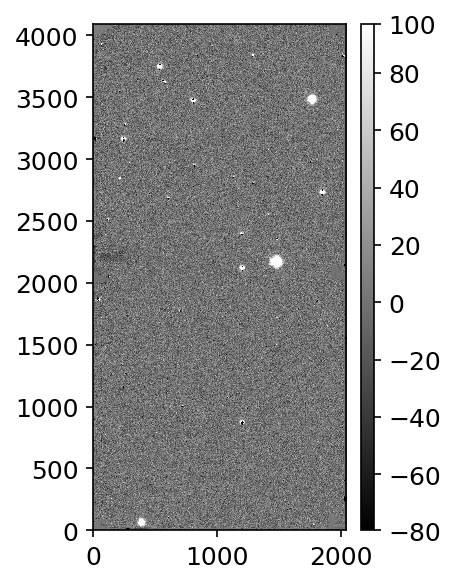

In [698]:
fig = plt.figure()
display = afwDisplay.Display(frame=fig)
display.scale("linear", "zscale")
display.mtv(exposure.image)


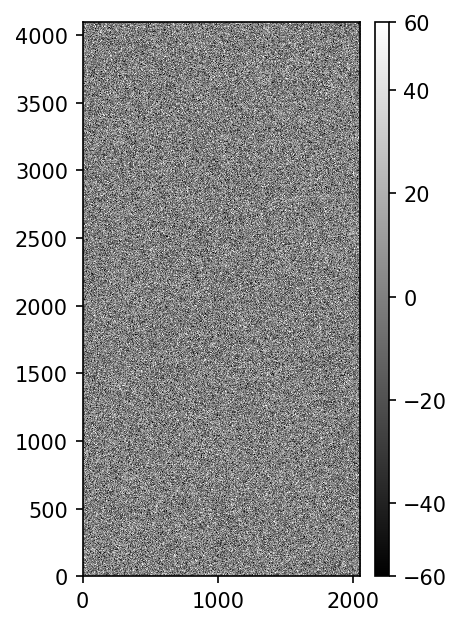

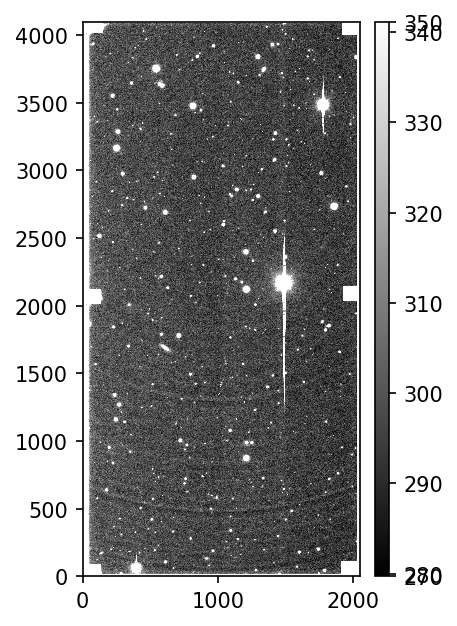

In [136]:
s = lsst.afw.geom.SpanSet(exposure.getBBox())
fp = lsst.afw.detection.Footprint(s)
noise = exposure.__class__(exposure, deep=True)

config = NoiseReplacer.ConfigClass()
replacer = NoiseReplacer(config, noise, {0: (0, fp)})
replacer.removeSource(0)

fig = plt.figure(dpi=150)
display = afwDisplay.Display(frame=fig)
display.scale("linear", "zscale")
display.mtv(noise.image)

fig = plt.figure(dpi=150)
display = afwDisplay.Display(frame=fig)
display.scale("linear", "zscale")
display.mtv(noise.variance)

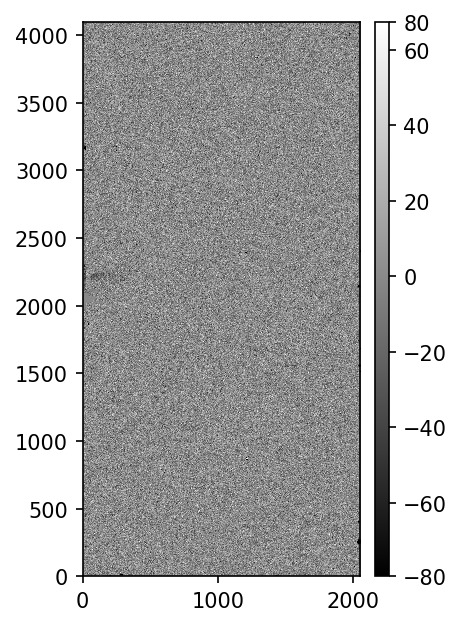

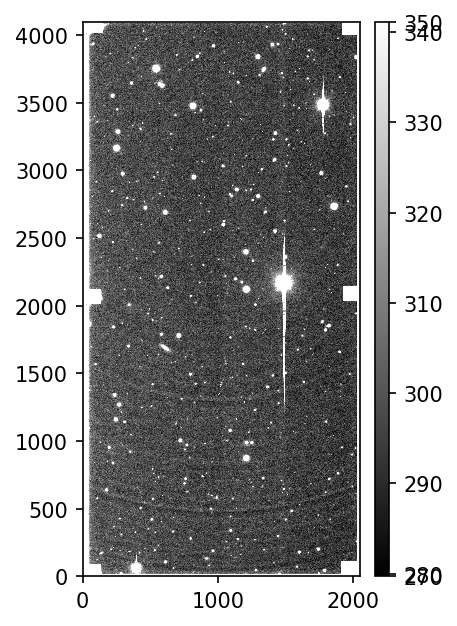

In [137]:
noise = exposure.__class__(exposure, deep=True)
config = NoiseReplacer.ConfigClass()
fps = results.positive.getFootprints()
replacer = NoiseReplacer(config, noise, {i: (0, fp) for i, fp in enumerate(fps)})
for i in range(len(fps)):
    replacer.removeSource(i)

fig = plt.figure(dpi=150)
display = afwDisplay.Display(frame=fig)
display.scale("linear", "zscale")
display.mtv(noise.image)
fig = plt.figure(dpi=150)
display = afwDisplay.Display(frame=fig)
display.scale("linear", "zscale")
display.mtv(noise.variance)

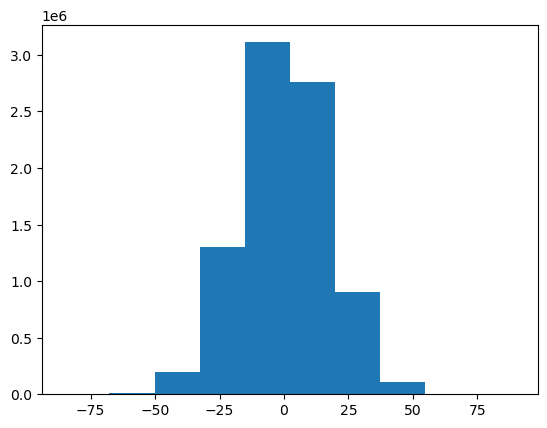

In [103]:
plt.hist(noise.image.array.flatten())
plt.show()

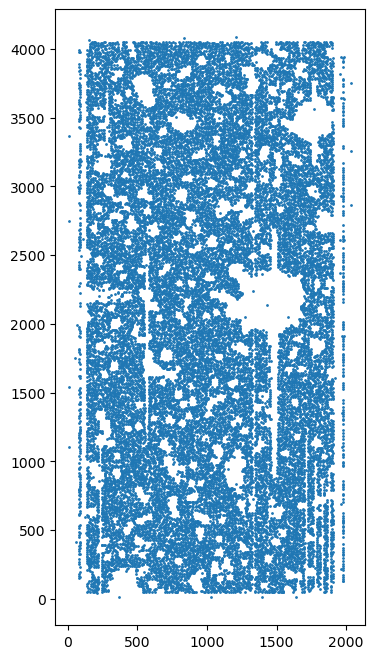

In [144]:
# c = detect(noise, threshold=0).catalog

fig = plt.figure(figsize=(4, 8))
plt.scatter(c['i_x'], c['i_y'], s=1)
plt.show()

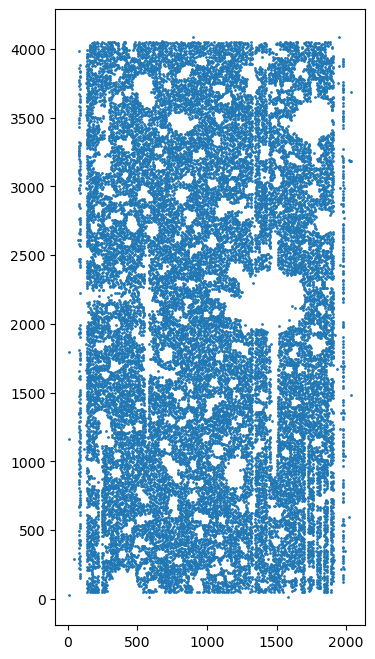

In [145]:
# c_e = detect(exposure, threshold=0).catalog

fig = plt.figure(figsize=(4, 8))
plt.scatter(c_e['i_x'], c_e['i_y'], s=1)
plt.show()

<Table length=34854>
  id     f_x     f_y    i_x   i_y    peakValue        significance    
         pix     pix    pix   pix        ct                           
int64  float32 float32 int32 int32    float32           float64       
------ ------- ------- ----- ----- ------------- ---------------------
  7258   106.0  2053.0   106  2053     1.5412045   0.47514405846595764
  7434    71.0  2140.0    71  2140    0.35250074    0.2195621132850647
  7526   187.0  2165.0   187  2165     0.3916723   0.24610908329486847
  7634   292.0  2195.0   292  2195    0.19854684   0.12530405819416046
  7655   310.0  2208.0   310  2208     0.2258121   0.14239642024040222
  7690   352.0  2222.0   352  2222     0.9869517    0.6213300228118896
  7689   340.0  2222.0   340  2222    0.68334436   0.43089526891708374
  7710   365.0  2227.0   365  2227    0.57793534   0.36400797963142395
  9325    14.0  2469.0    14  2469     2.9786937    0.8714421987533569
   ...     ...     ...   ...   ...           ...                   ...
109566   451.0   651.0   451   651   0.056815505   0.03601915016770363
108922   535.0   493.0   535   493   0.055287063   0.03513669595122337
110246   750.0   815.0   750   815    0.05339904   0.03381796553730965
122863  1227.0  4044.0  1227  4044   0.041827235   0.02657635137438774
118342   524.0  2807.0   524  2807   0.027377248  0.017334893345832825
108105   533.0   309.0   533   309   0.017812788  0.011237540282309055
109992   456.0   742.0   456   742   0.009286076  0.005867691710591316
  7986   800.0  2316.0   800  2316  6.881356e-05 4.366302164271474e-05
 11307   427.0  3425.0   427  3425 6.0796738e-06 3.854651367873885e-06
 35263  2036.0  4082.0  2036  4082     0.5534711   0.17090395092964172

AttributeError: 'list' object has no attribute 'items'

In [564]:
x = np.arange(6)
y = [len(detect(images[0], threshold=float(t)).catalog) for t in x]
# catalog.catalog['significance']

In [565]:
y_noise = []
for t in x:
    try:
        y_noise.append(len(detect(noise, threshold=float(t)).catalog))
    except ValueError:
        y_noise.append(0)

NameError: name 'x' is not defined

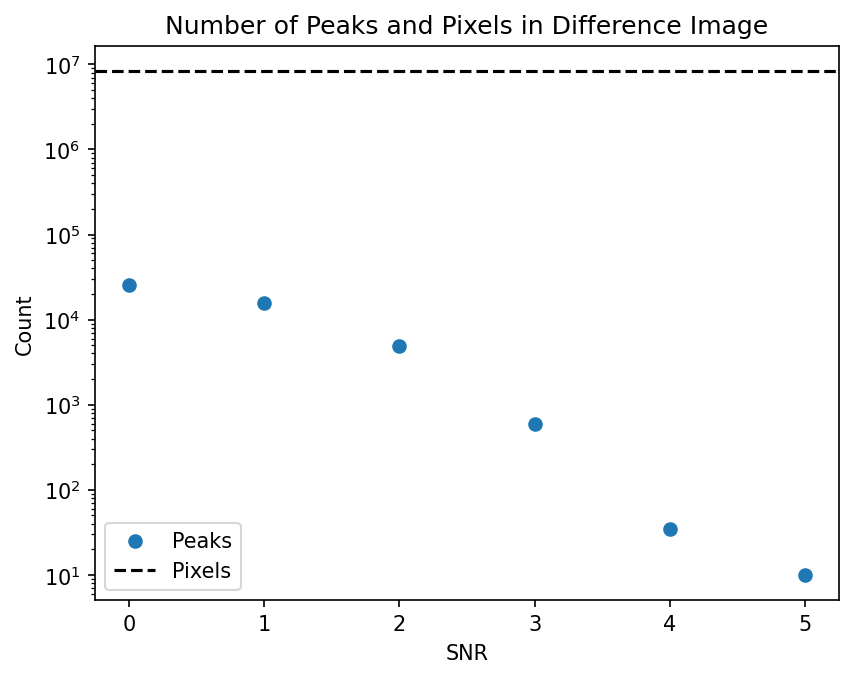

In [569]:
fig = plt.figure(dpi=150, facecolor='white')
plt.scatter(x, y, label="Peaks")
# plt.scatter(x, y_noise, label="Peaks (noise)")
plt.axhline(2048*4096, ls="--", color='k', label="Pixels")
plt.yscale("log")
plt.xlabel("SNR")
plt.ylabel("Count")
plt.title("Number of Peaks and Pixels in Difference Image")
plt.legend()
for ext in ['png', 'jpg', 'pdf']:
    plt.savefig(f"figures/paper/peaks_and_pixels.{ext}", bbox_inches='tight')
plt.show()

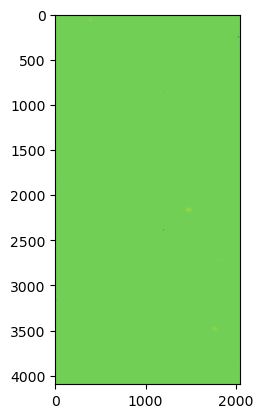

In [571]:
fig = plt.figure(dpi=150, facecolor='white')
plt.imshow(exposure.image.array, cmap='gray')
plt.show()

In [153]:
d = (np.subtract.outer(c['ra'], c['ra'])**2 + np.subtract.outer(c['dec'], c['dec'])**2)**0.5

In [158]:
a = np.triu(d)
b = a[a != 0]

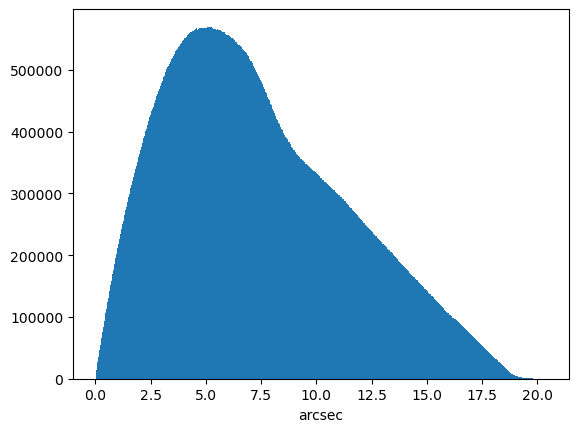

In [162]:
plt.hist(b * 3600, bins='auto')
plt.xlabel("arcsec")
plt.show()

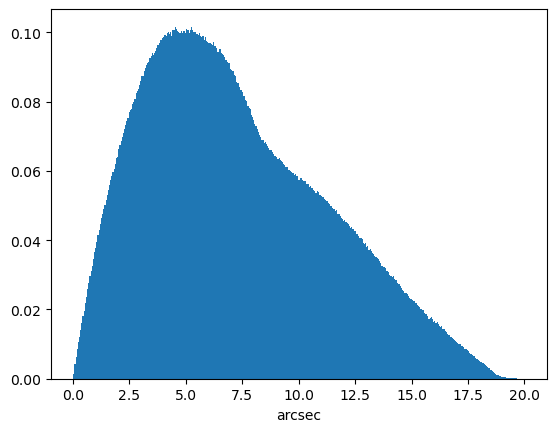

In [173]:
c_3 = detect(noise, threshold=2).catalog

d_3 = (np.subtract.outer(c_3['ra'], c_3['ra'])**2 + np.subtract.outer(c_3['dec'], c_3['dec'])**2)**0.5

a_3 = np.triu(d_3)
b_3 = a_3[a_3 != 0]

counts, edges, artist = plt.hist(b_3 * 3600, bins='auto', density=True)
plt.xlabel("arcsec")
plt.show()

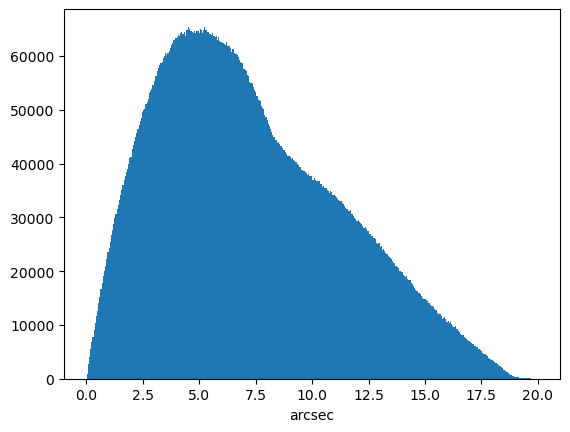

In [170]:
counts, edges, artist = plt.hist(b_3 * 3600, bins='auto')
plt.xlabel("arcsec")
plt.show()


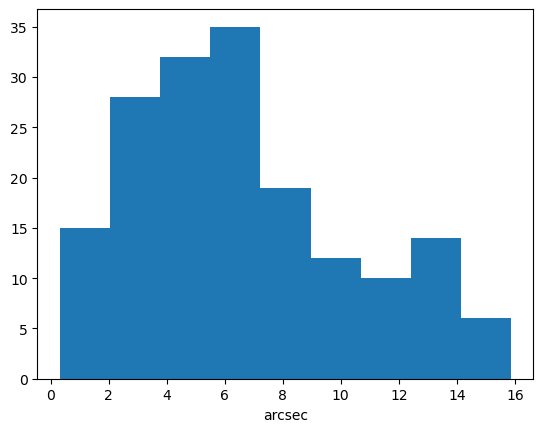

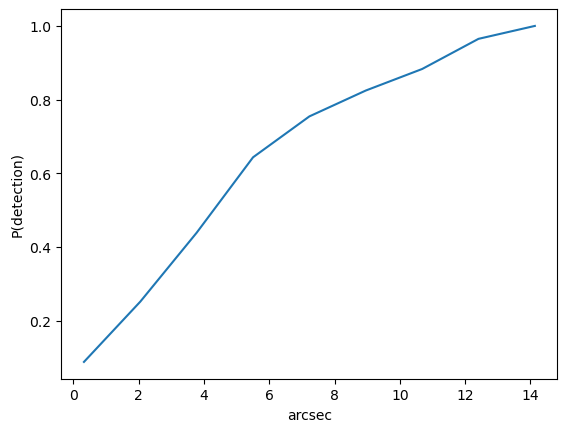

In [175]:
c_3 = detect(noise, threshold=4).catalog

d_3 = (np.subtract.outer(c_3['ra'], c_3['ra'])**2 + np.subtract.outer(c_3['dec'], c_3['dec'])**2)**0.5

a_3 = np.triu(d_3)
b_3 = a_3[a_3 != 0]

counts, edges, artist = plt.hist(b_3 * 3600, bins='auto')
plt.xlabel("arcsec")
plt.show()

plt.plot(edges[:-1], np.cumsum(counts) / counts.sum())
plt.xlabel("arcsec")
plt.ylabel("P(detection)")
plt.show()

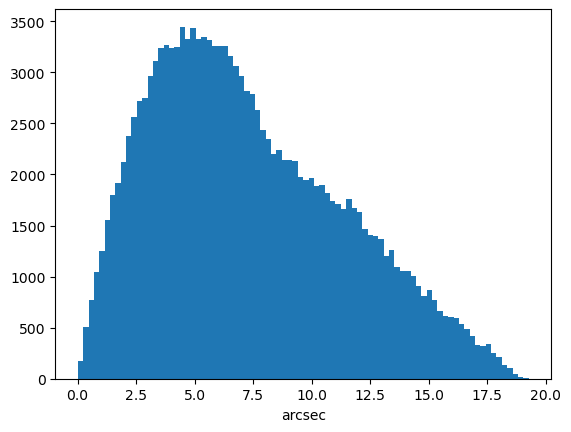

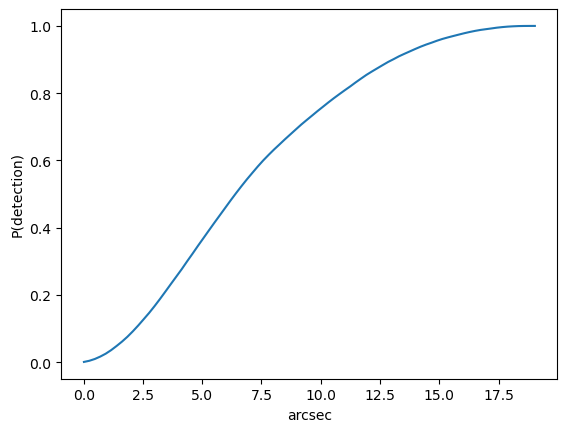

In [176]:
c_3 = detect(noise, threshold=3).catalog

d_3 = (np.subtract.outer(c_3['ra'], c_3['ra'])**2 + np.subtract.outer(c_3['dec'], c_3['dec'])**2)**0.5

a_3 = np.triu(d_3)
b_3 = a_3[a_3 != 0]

counts, edges, artist = plt.hist(b_3 * 3600, bins='auto')
plt.xlabel("arcsec")
plt.show()

plt.plot(edges[:-1], np.cumsum(counts) / counts.sum())
plt.xlabel("arcsec")
plt.ylabel("P(detection)")
plt.show()

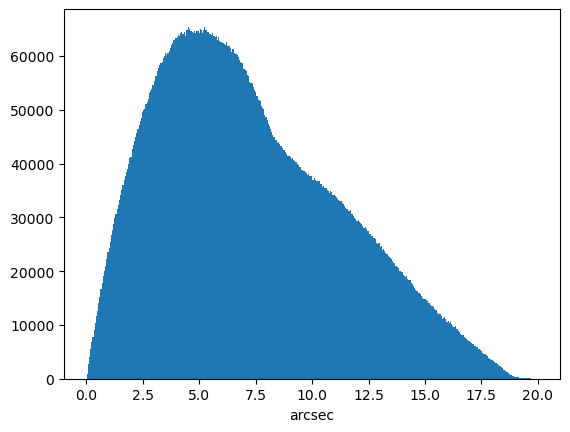

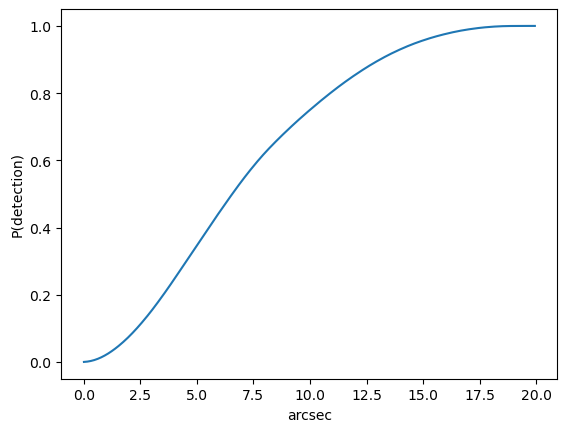

In [177]:
c_3 = detect(noise, threshold=2).catalog

d_3 = (np.subtract.outer(c_3['ra'], c_3['ra'])**2 + np.subtract.outer(c_3['dec'], c_3['dec'])**2)**0.5

a_3 = np.triu(d_3)
b_3 = a_3[a_3 != 0]

counts, edges, artist = plt.hist(b_3 * 3600, bins='auto')
plt.xlabel("arcsec")
plt.show()

plt.plot(edges[:-1], np.cumsum(counts) / counts.sum())
plt.xlabel("arcsec")
plt.ylabel("P(detection)")
plt.show()

In [178]:
import scipy.stats

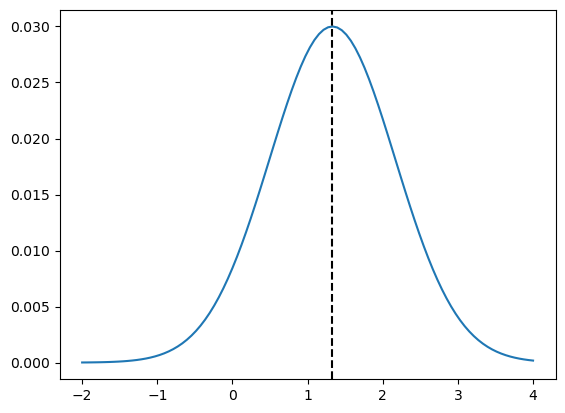

In [191]:
x = np.linspace(-2, 4, 100)
p = lambda x : scipy.stats.norm(1.33, 0.835).pdf(x) * 0.030/0.47777518610950026
y = p(x)
plt.plot(x, y)
plt.axvline(1.33, color='k', ls="--")
plt.show()

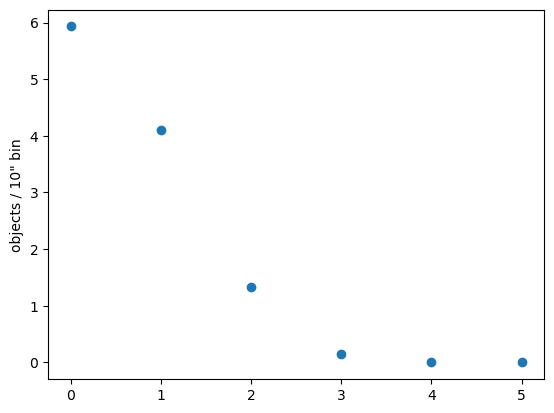

In [229]:
psf = 1
dx = 10

t = np.arange(6)
plt.scatter(t, ((1 - scipy.stats.norm(1.33, 0.835).cdf(t)) * 0.030/0.47777518610950026)*(dx/psf)**2)
plt.xticks(t)
plt.ylabel("objects / 10\" bin")
plt.show()

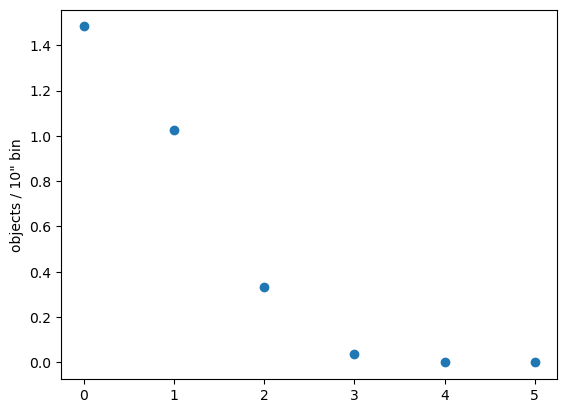

In [230]:
psf = 1
dx = 5

t = np.arange(6)
plt.scatter(t, ((1 - scipy.stats.norm(1.33, 0.835).cdf(t)) * 0.030/0.47777518610950026)*(dx/psf)**2)
plt.xticks(t)
plt.ylabel("objects / 10\" bin")
plt.show()

In [399]:
def num_objects(snr):
    return (1 - scipy.stats.norm(1.33, 0.835).cdf(snr)) * 0.030/0.47777518610950026

def num_objects_per_bin(snr, width, psf=1):
    return num_objects(snr) * (width/psf)**2

def required_bin_width_for_count(snr, count, psf=1):
    return psf * (count / num_objects(snr))**0.5

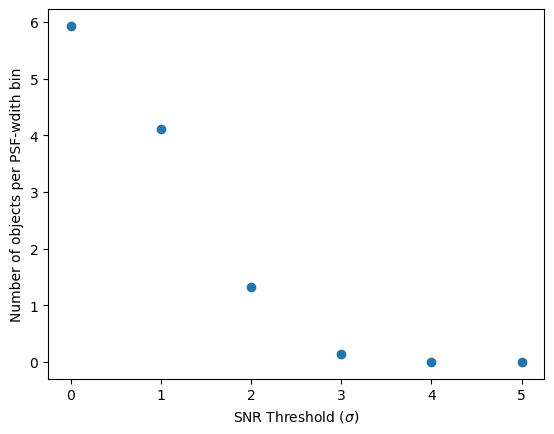

In [400]:
plt.scatter(t, num_objects_per_bin(t, 10))
# plt.axhline(10)
plt.xlabel("SNR Threshold ($\sigma$)")
plt.ylabel("Number of objects per PSF-wdith bin")
# plt.yscale("log")
plt.show()

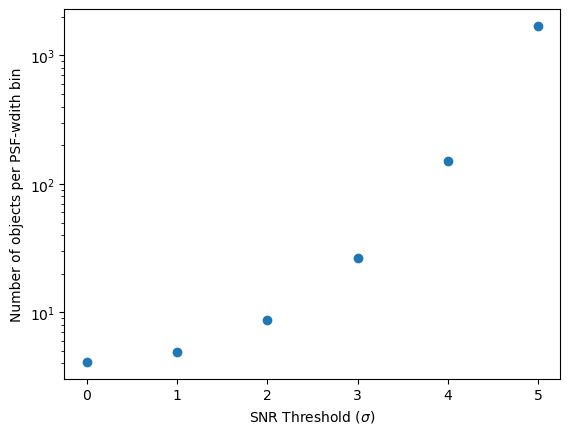

In [401]:
plt.scatter(t, required_bin_width_for_count(t, 1))
plt.xlabel("SNR Threshold ($\sigma$)")
plt.ylabel("Number of objects per PSF-wdith bin")
plt.yscale("log")
plt.show()

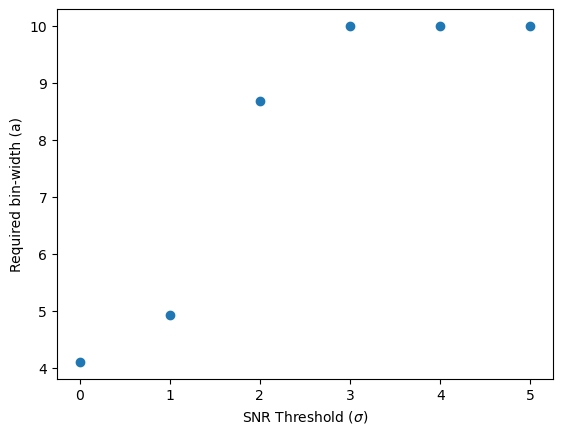

In [385]:
y = np.clip(
    (
        1/(
            (
                1 - scipy.stats.norm(1.33, 0.835).cdf(t)
            ) * 0.030/0.47777518610950026
        )
    )**0.5,
    0, 10
)
plt.scatter(t, y)
plt.xlabel("SNR Threshold ($\sigma$)")
plt.ylabel("Required bin-width (a)")
# plt.yscale("log")
plt.show()

In [4]:
from salad.hough import Hough
from salad.project import project
from salad.directions import SearchDirections
import astropy.units as u

In [293]:
c['ra'].to(u.deg)

<Quantity [216.14818855, 216.14719687, 216.14719908, ..., 216.28503152,
           216.28502941, 216.28776568] deg>

In [365]:
len(c)

25687

In [348]:
X = np.array([c['ra'].to(u.deg), c['dec'].to(u.deg), np.ones_like(c['dec'])]).T
X

array([[216.14818855, -11.0051722 ,   1.        ],
       [216.14719687, -11.0107063 ,   1.        ],
       [216.14719908, -11.01019633,   1.        ],
       ...,
       [216.28503152, -11.11294712,   1.        ],
       [216.28502941, -11.11352966,   1.        ],
       [216.28776568, -11.07748735,   1.        ]])

In [324]:
height, width

(0.14801908195219227, 0.30330383296058017)

In [328]:
# So if I bin the detections in 10 arcsec bins as SNR>=3 I should find there < 1 objects per bin?

In [358]:
directions = SearchDirections([0*u.deg/u.day, 0.05*u.deg/u.day], [0*u.deg, 0*u.deg], 10*u.arcsec, 1*u.day)
projection = project(X, directions, 1)

In [ ]:
# distribution of peaks per bin as a function of dx per SNR

In [402]:
required_bin_width_for_count(0, 1)

4.106514779078898

In [406]:
_c = detect(noise, threshold=float(0)).catalog

In [418]:
_c = detect(noise, threshold=float(0), no_masks=True).catalog

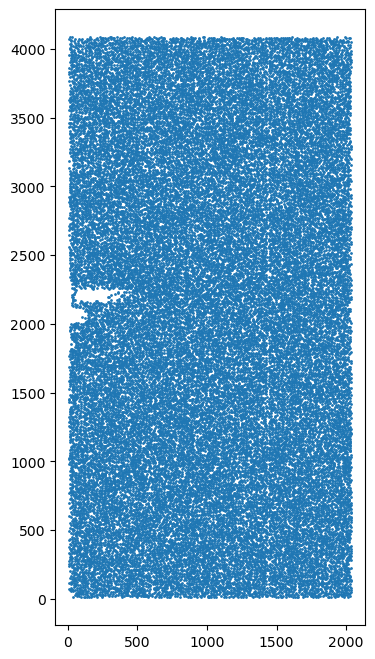

In [423]:
fig = plt.figure(figsize=(4, 8))
plt.scatter(_c['i_x'], _c['i_y'], s=1)
plt.show()

In [424]:
_c[_c['significance'] > 5]

<Table length=6>
   id      f_x     f_y   ...         ra                 dec         
           pix     pix   ...        rad                 rad         
 int64   float32 float32 ...      float64             float64       
-------- ------- ------- ... ------------------ --------------------
32884780    58.0  2243.0 ...  3.772547905124872 -0.19186939738190364
32884685    55.0  2173.0 ...  3.772457023410742  -0.1918653321766405
32884779    53.0  2233.0 ...  3.772534951899648 -0.19186300554293365
32884372   126.0  2152.0 ...  3.772429301668111 -0.19195551836072516
32908906   184.0  2262.0 ...  3.772571798496328  -0.1920296478633843
32919981   815.0  2942.0 ... 3.7734518176668015  -0.1928342601237377

In [425]:
(_c['significance'] > 5).sum()


6

In [490]:
bbox = exposure.getBBox()

center = bbox.getCenter() # center of the detector in pixels
shape = exposure.psf.computeShape(center) # the shape of the PSF
psfSigma = shape.getDeterminantRadius() # the standard deviation of the Gaussian PSF model
fwhm = 2.355 * psfSigma # the FWHM of the Gaussian PSF model
fwhm * 0.263, psfSigma * 0.263

(1.91070050938846, 0.8113377959186666)

In [60]:
psfs = []
for image in images:
    bbox = image.reader.readBBox()
    psf = image.reader.readPsf()
    psfSigma = psf.computeShape(bbox.getCenter()).getDeterminantRadius() * 0.263
    psfs.append(psfSigma)
    
psfs = np.array(psfs)

In [211]:
(n_pk_above(0) * (4/psfs)**2).sum()

152.48601510091333

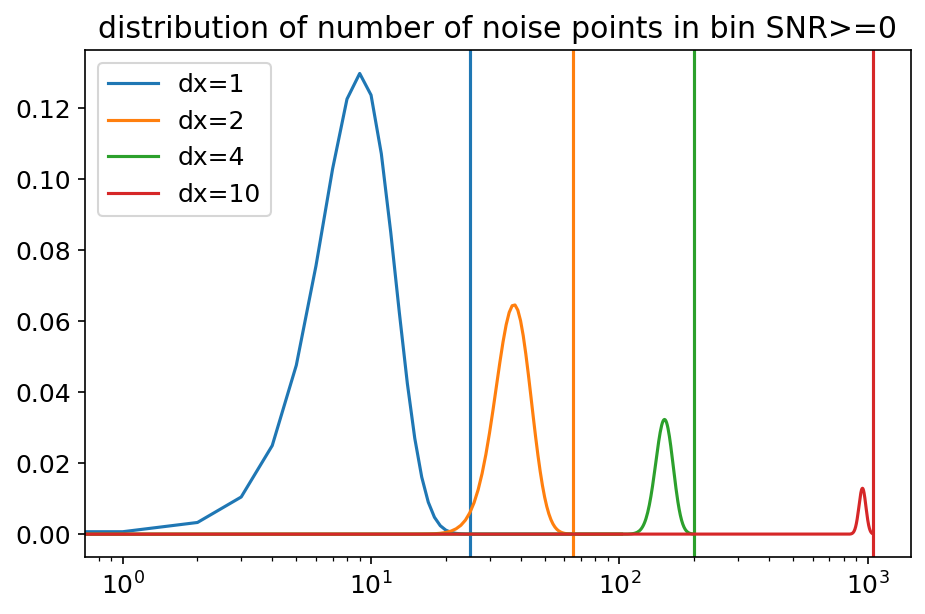

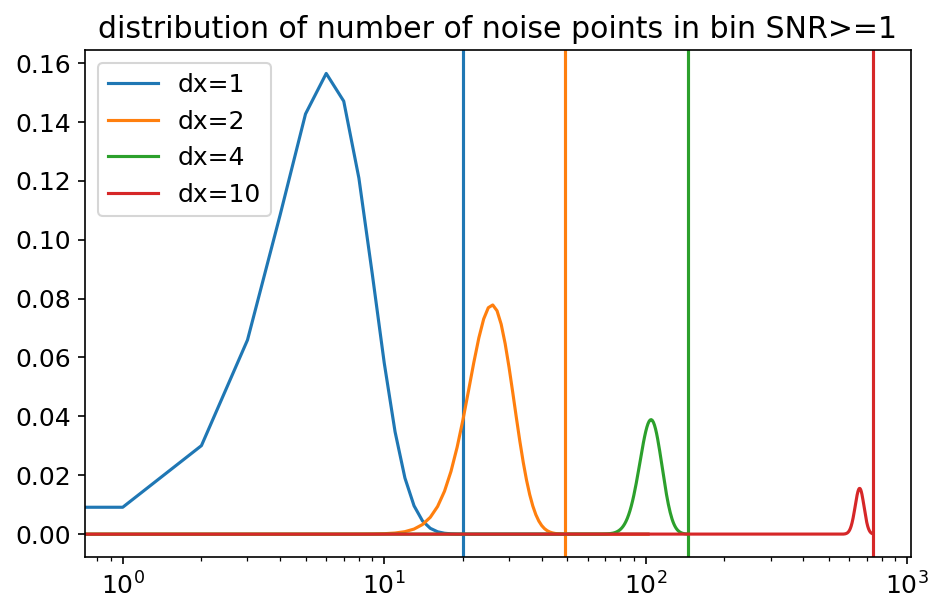

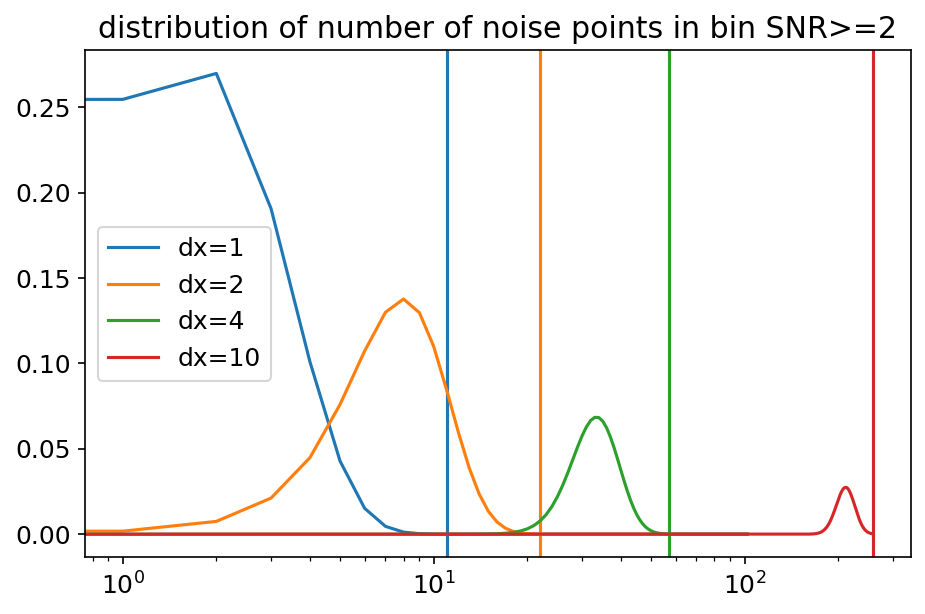

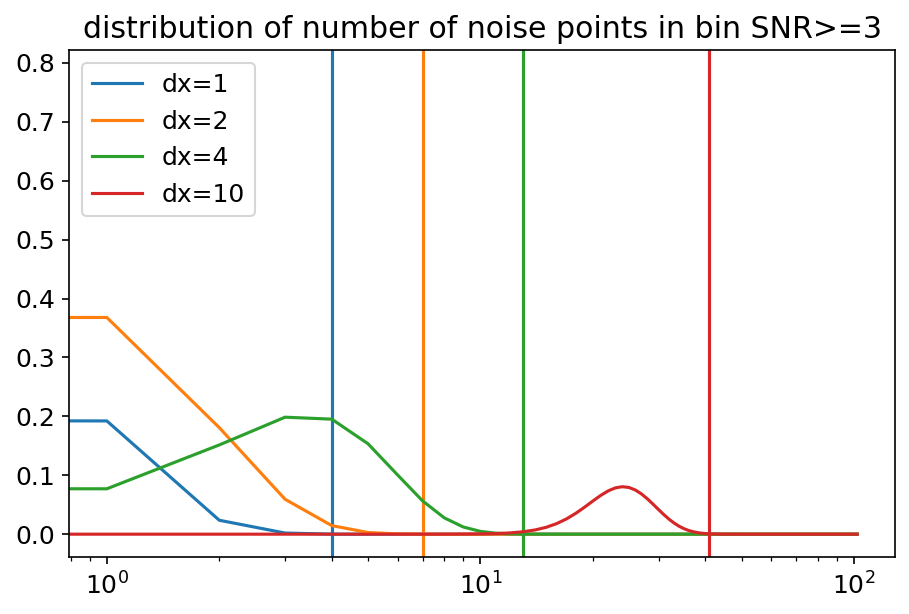

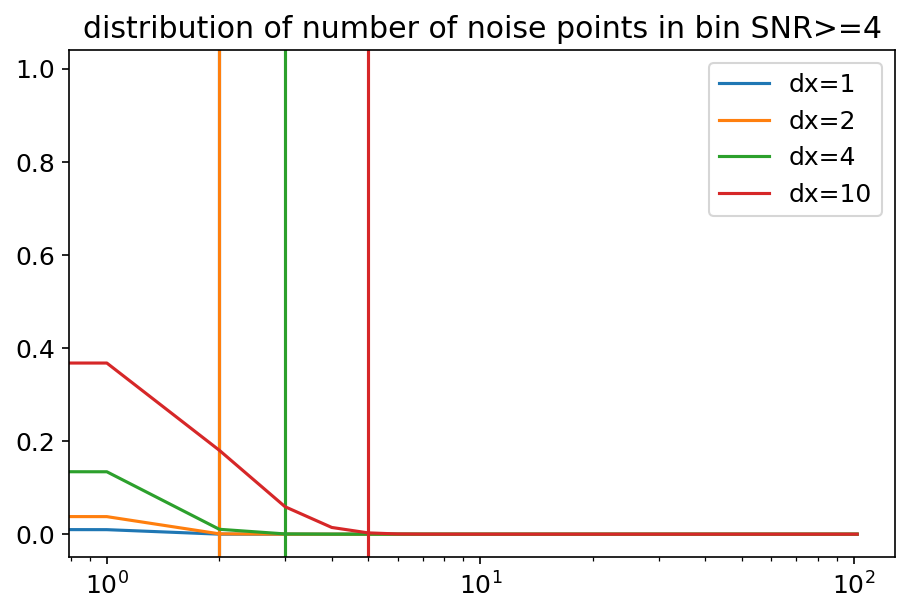

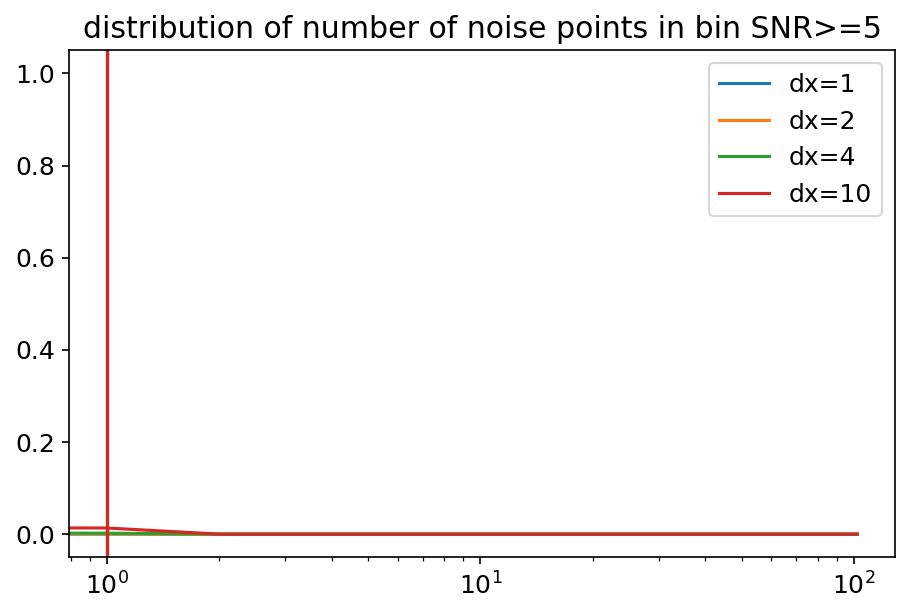

In [260]:
N = np.arange(104)
Nnoise = 10 # admissable noise stacks produced
Nmin_for_noise = {}
for thresh in np.arange(6):
# dx = 1
    Ndir = 2

    for i, dx in enumerate([1, 2, 4, 10]):
        Nstacks = ((2048*0.263/dx)*(4096*0.263/dx)*Ndir)        
        p = scipy.stats.poisson((n_pk_above(thresh) * (dx/psfs)**2).sum())

        Nmin = p.isf(Nnoise/Nstacks) # this number of points will give me Nnoise false positive results
        Nmin_for_noise[(dx, thresh)] = Nmin
        
        plt.plot(np.arange(max(Nmin, N.max())), p.pmf(np.arange(max(Nmin, N.max()))), label=f'dx={dx}')
        plt.axvline(Nmin, color=f'C{i}')
    plt.xscale("log")
    plt.title(f"distribution of number of noise points in bin SNR>={thresh}")
    plt.legend()
    plt.show()

In [261]:
Nmin_for_noise[(1, 0)]

25.0

In [22]:
def P_f(f_th, f):
    return 0.5 * scipy.special.erfc((f_th - f)/(2**0.5))

def P_n(n_obs, n_epochs, f_th, f):
    return scipy.stats.binom(n_epochs, P_f(f_th, f)).pmf(n_obs)

def P_n_or_more(n_obs, n_epochs, f_th, f):
    return 1 - scipy.stats.binom(n_epochs, P_f(f_th, f)).cdf(n_obs)

def prob_contain(snr, dx, psf):
    sigma_x = (2 * (psf/snr)**2)**0.5
    x = np.vstack([np.zeros_like(np.atleast_1d(dx)), np.atleast_1d(dx)]).T
    mean = np.array([0, 0])
    cov = np.array(
        [
            [sigma_x**2, 0], 
            [0, sigma_x**2]
        ]
    )
    md = (mean - x) @ np.linalg.inv(cov) @ (mean - x).T # mahalanobis distance
    return scipy.stats.chi2(2).cdf(np.diag(md))

def prob_contain_2(snr, dx):
    return scipy.stats.chi2(2).cdf(0.5 * (snr * dx)**2)

def prob_in_box(snr, dx):
#     sigma_x = (2 * (psf/snr)**2)**0.5
#     p = 1 - scipy.stats.norm(0, sigma_x).cdf(-dx) * 2
    p = scipy.stats.chi2(1).cdf(0.5 * (snr * dx)**2)
    return scipy.stats.binom(2, p).pmf(2)

scipy.stats.poisson(prob_in_box(3, 1/psfs).sum()).isf(0.99)

NameError: name 'psfs' is not defined

In [591]:
from itertools import combinations, combinations_with_replacement

In [ ]:
list(combinations_with_replacement(prob_detect(3, 3)*prob_in_box_2(3, 1/psfs), 104))

In [75]:
import scipy.special
import numpy as np

def prob_detect_in_box(v_th, v, dx):
    return 0.5 * scipy.special.erfc(
        (v_th - v)/(2**0.5)
    ) * scipy.special.erf(
        v * dx/4
    )**2

In [76]:
scipy.stats.binom(104, prob_detect_in_box(0, 0.5, 1)).isf(0.99)

0.0

In [106]:
prob_detect_in_box(thresh, snr, dx/psfs.mean())

0.6914424279280716

In [112]:
p_signal.pmf(104)

2.1608598361583278e-17

In [144]:
from itertools import combinations

In [275]:
# [p_ratio(N, 0, 5, 1)(l)for l in x]

[4.208603991936972e-125,
 2.8652299938357968e-124,
 3.875446312662706e-123,
 1.4529655719643541e-121,
 3.179730514303619e-119,
 7.013866837700774e-118,
 1.9865093200299455e-115,
 1.9865093200299455e-115,
 7.961242334067303e-113,
 1.951779040912557e-108,
 1.951779040912557e-108,
 1.951779040912557e-108,
 3.621280467638962e-105,
 1.1014887132760739e-102,
 3.5055869848901985e-100,
 8.383865512322312e-99,
 6.882990116735471e-93,
 6.882990116735471e-93,
 6.882990116735471e-93,
 6.882990116735471e-93,
 2.904819076179848e-88,
 1.178996425196797e-86,
 7.895365272971924e-84,
 1.0264289013234706e-81,
 1.6950834146063672e-77,
 1.6950834146063672e-77,
 1.6950834146063672e-77,
 1.1472692334560004e-73,
 2.193429674190453e-70,
 2.193429674190453e-70,
 1.9120766675132445e-68,
 2.0950259461857842e-66,
 6.893086737769957e-64,
 3.66869281358236e-62,
 6.577321564901138e-61,
 5.877597352906918e-60,
 1.4892938549806578e-45,
 1.3967731578394313e-44,
 2.3811380450658635e-43,
 1.04165284012647e-41,
 2.07064847

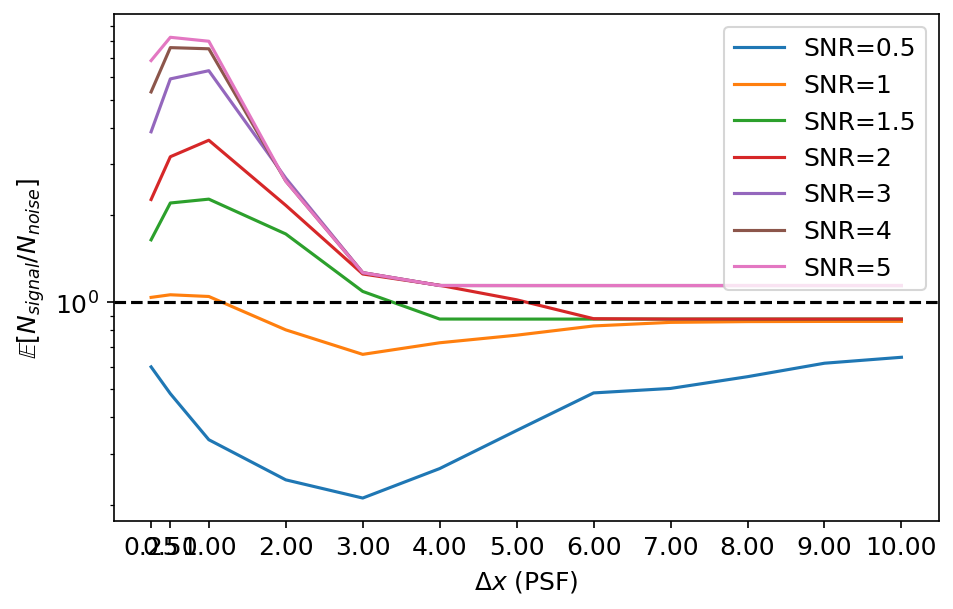

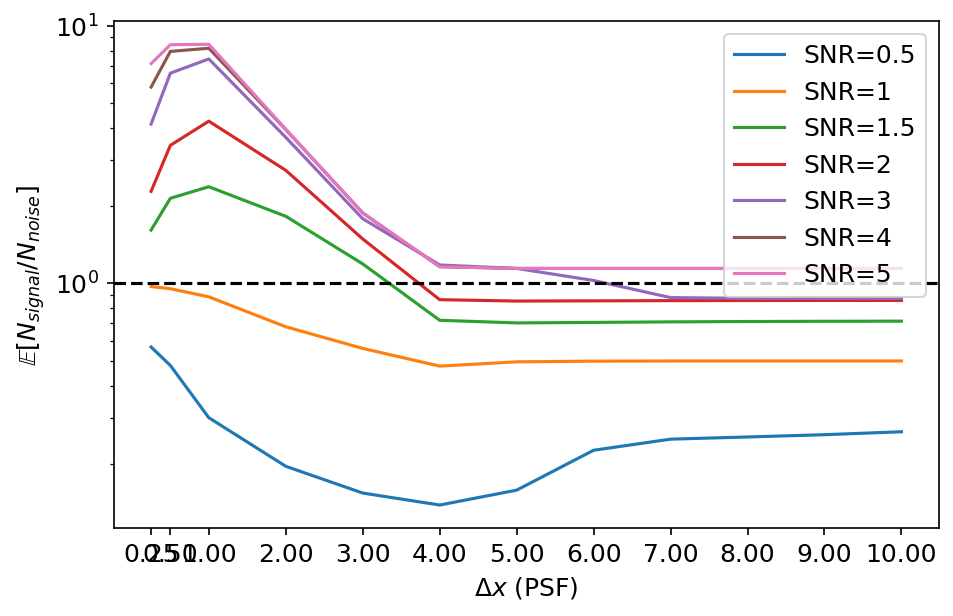

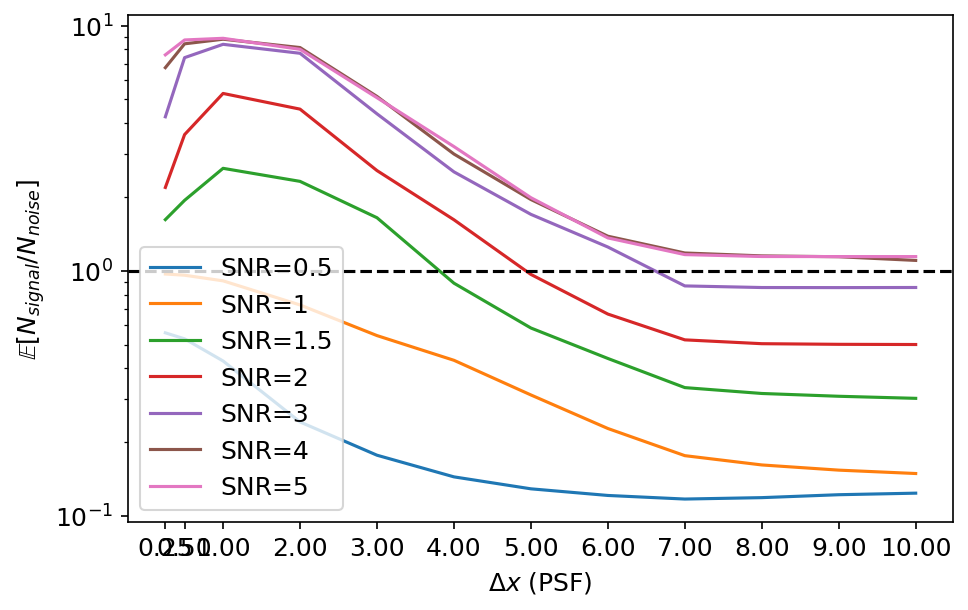

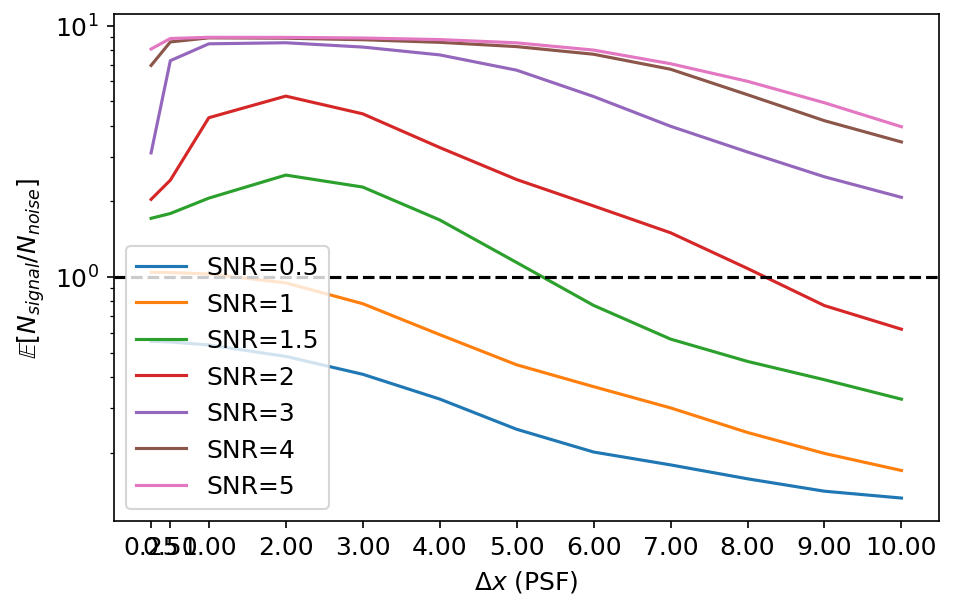

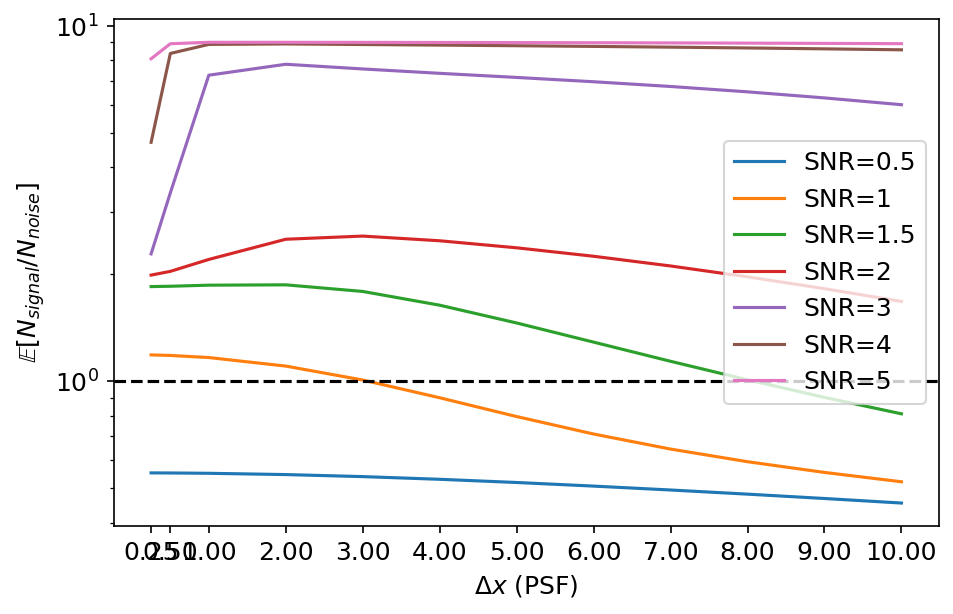

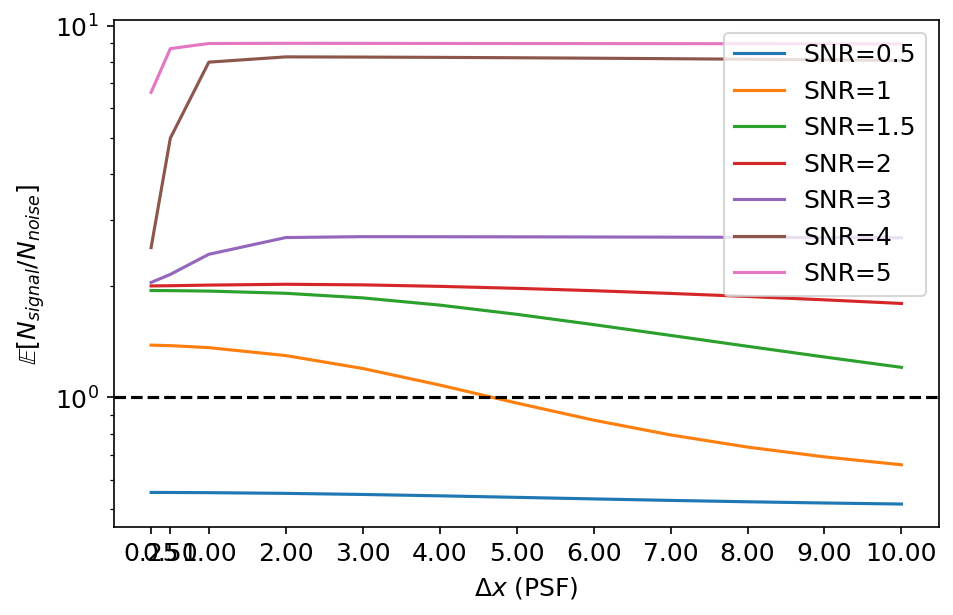

In [276]:
# I want to inspect the value of Nsignal / Nnoise
# Nsignal ~ Binom(N, p_signal)
# Nnoise ~ Poisson(p_noise)
# P(Nsignal/Nnoise) = \int |y| Px(zy) Py(y) dy
N = 104

_ratio_N = N + 1
_ratio_y = np.arange(_ratio_N)
_ratio_abs_y = np.abs(_ratio_y)

def p_ratio(N, thresh, snr, dx):
    p_signal = scipy.stats.binom(N, prob_detect_in_box(thresh, snr, dx/psfs.mean()))
    p_noise = scipy.stats.poisson((n_pk_above(thresh) * (dx/psfs)**2).sum())
    
    return lambda z : (_ratio_abs_y * p_signal.pmf(z * _ratio_y) * p_noise.pmf(_ratio_y)).sum() / _ratio_N


# p_ratio(N, thresh)(5/10)

# r = np.linspace(0, 4, 100)
x = list(map(lambda x : x[0]/x[1], list(combinations(np.arange(1, 10), 2)))) \
    + list(map(lambda x : x[1]/x[0], list(combinations(np.arange(1, 10), 2))))

x = np.array(x)
x.sort()

# dx = 1
# snr = 0.5
# thresh = 0
threshes = [0, 1, 2, 3, 4, 5]
dxs = [0.25, 0.5, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
snrs = [0.5, 1, 1.5, 2, 3, 4, 5] #[0.5, 1, 2, 3, 4, 5]:
for thresh in threshes:
    for snr in snrs:
        es = []
#         es_signal = []
#         es_noise = []
        for dx in dxs:
#             p_signal = scipy.stats.binom(N, prob_detect_in_box(thresh, snr, dx/psfs.mean()))
#             p_noise = scipy.stats.poisson((n_pk_above(thresh) * (dx/psfs)**2).sum())
                
            y = np.array([p_ratio(N, thresh, snr, dx)(l) for l in x])
            Z = y.sum()
            y /= Z
            e = (x * y).sum()
            es.append(e)
#             es_signal.append(p_signal.expect())
#             es_noise.append(p_noise.expect())

        plt.plot(dxs, es, label=f"SNR={snr}")

    plt.legend()
    plt.axhline(1, color='k', ls='--')
    # plt.axvline(e)
    plt.xlabel("$\Delta x$ (arcsec)")
    plt.ylabel("$\mathbb{E}[N_{signal} / N_{noise}]$")
    plt.xticks(np.arange(11))
    plt.yscale("log")
    plt.savefig(f"figures/expected_signal_thresh_{thresh}.pdf")
    plt.savefig(f"figures/expected_signal_thresh_{thresh}.png")
    plt.show()

# for snr in [0.5]:
#     N_e = []
#     for dx in dxs:
# #         p_signal = scipy.stats.binom(N, prob_detect_in_box(thresh, snr, dx/psfs.mean()))
# #         p_noise = scipy.stats.poisson((n_pk_above(thresh) * (dx/psfs)).sum())

# #         # g = p_signal / p_noise
# #         # \int N g dN = \int N p_signal / p_noise dN

# #         x = np.arange(N)
# #         y = p_signal.pmf(x) / p_noise.pmf(x)
# #         Z = y.sum()
# #         y /= Z
# #         N_e.append((x * y).sum())
#         N_e.append(p_ratio(N, thresh, snr, dx)(dx))

#     plt.plot(dxs, N_e, label=f'SNR={snr}')

# plt.xlabel("$\Delta$ x")
# plt.ylabel("")
# plt.show()

In [318]:
n_pk_above(0)

0.05860467493899063

In [285]:
p_ratio(104, 5, 1, 1)(1.4)

2.8679266284586375e-51

In [299]:
scipy.stats.binom(N, prob_detect_in_box(5, 1, 6)).isf(0.5)

0.0

In [301]:
p_signal.expect()

71.9100125045195

In [219]:
5/2*np.log10(1.5/5)

-1.307196863200844

In [191]:
psfs * 6.2


array([5.03029433, 5.59216338, 5.15349293, 4.86167814, 4.80864086,
       4.79263675, 4.55671688, 4.63038512, 5.30324027, 4.85064991,
       5.6212117 , 5.30905774, 4.2951166 , 4.66983246, 5.1313539 ,
       4.74192788, 5.1512176 , 6.09275492, 4.61267857, 4.76443604,
       5.08302809, 4.89726109, 7.10718117, 6.72641364, 5.2700421 ,
       4.90370229, 5.53242026, 4.78244059, 4.7142469 , 5.70628807,
       5.01466865, 4.62017204, 4.49743705, 5.25719101, 4.81044199,
       4.80780493, 5.35479188, 4.65255811, 5.09054319, 4.96977407,
       4.65314452, 5.30391629, 4.83700356, 5.12154552, 4.90201112,
       4.07531154, 4.75596146, 4.70138494, 5.10644897, 6.34602934,
       4.38446574, 4.59850173, 4.85503268, 6.93740861, 5.14634479,
       4.97222823, 4.5373743 , 5.31218031, 4.25207599, 4.06943169,
       6.48339991, 4.90698476, 4.60649494, 4.32427928, 4.37739529,
       5.32332725, 6.34449237, 5.08081737, 4.97406395, 5.74560616,
       4.19823097, 4.41325345, 4.40689617, 5.43826365, 4.96285

In [ ]:
scipy.stats.

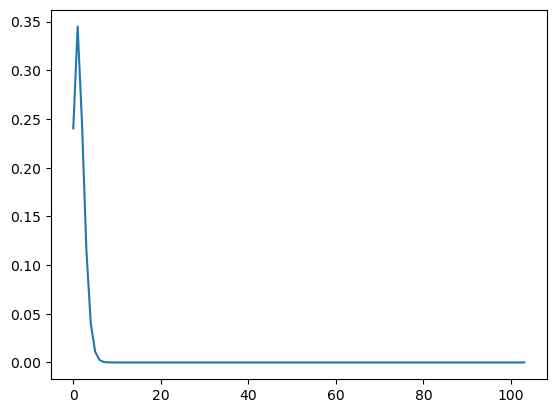

In [55]:
import matplotlib.pyplot as plt
p = scipy.stats.binom(
    104, 
    prob_detect_in_box(0, 0.5, 1)
)
N = np.arange(104)
plt.plot(N, p.pmf(N))
# plt.axvline(p.isf(0.50), color='k')
# plt.axvline(p.isf(0.01), color='k')
plt.show()

In [56]:
p.isf(0.5) # I expect only 1 detection in the bin

1.0

In [57]:
# how does this compare? to actual data?
# I mean, what is the scatter in points for a real object?

In [577]:
def prob_in_box_2(snr, dx):
    return scipy.special.erf(dx * (snr/4))**2

In [563]:
prob_in_box(1, 1/2**0.5)

0.14663149630841177

In [572]:
u = 0
s = (2**0.5)
x = -2**0.5
1 - 2 * (0.5 * (1 + scipy.special.erf((x - u)/(s *(2**0.5)))))

0.6826894921370859

In [583]:
prob_in_box_2(
    1, 
    (2**0.5)
)**0.5

0.19741265136584746

In [542]:
prob_in_box_2(0.5, 1)

0.01968863732984986

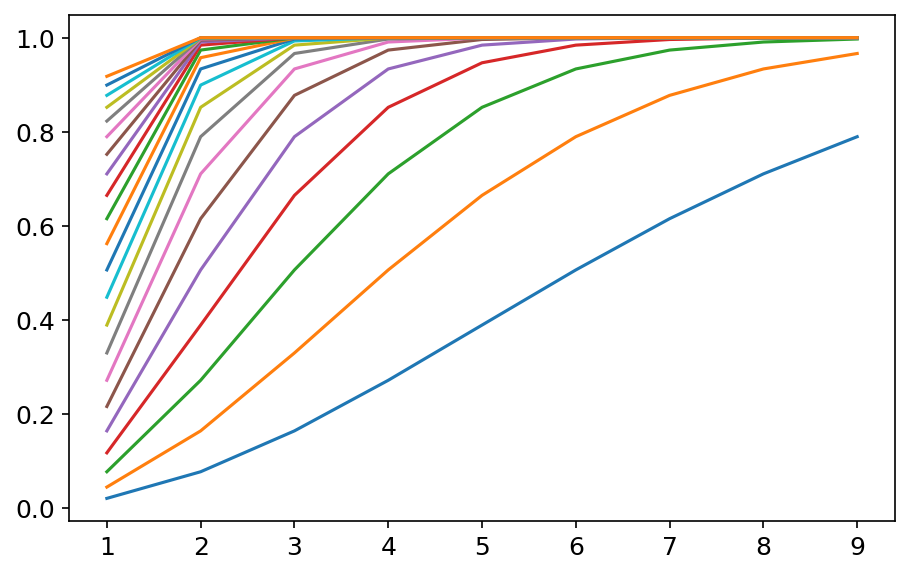

In [540]:
# for dx in np.arange(1, 10):
for snr in np.arange(1, 12, 0.5)/2:
    plt.plot(np.arange(1, 10), prob_in_box_2(snr, np.arange(1, 10)))

plt.show()

In [506]:
prob_contain_2(3, 1/psfs)

array([0.96722389, 0.93706842, 0.96148031, 0.97424849, 0.97625604,
       0.97684281, 0.98447725, 0.98229593, 0.95382285, 0.9746739 ,
       0.93524839, 0.95351076, 0.99079774, 0.98105275, 0.96254995,
       0.97864381, 0.961591  , 0.90269515, 0.98283684, 0.9778553 ,
       0.9648279 , 0.97284732, 0.81954351, 0.85215748, 0.95558318,
       0.97258902, 0.94073652, 0.97721204, 0.97958973, 0.9297845 ,
       0.96791575, 0.98260922, 0.98610158, 0.95625511, 0.97618946,
       0.97628691, 0.95101998, 0.98160364, 0.96447881, 0.96985723,
       0.98158511, 0.95378664, 0.97519451, 0.96301862, 0.97265698,
       0.99452564, 0.97815423, 0.98002033, 0.96373368, 0.88324077,
       0.98888179, 0.98326232, 0.97450534, 0.83422043, 0.96182745,
       0.96975288, 0.98501999, 0.9533428 , 0.991635  , 0.99460746,
       0.87223936, 0.97245685, 0.98302326, 0.99019913, 0.98904235,
       0.95274069, 0.88336221, 0.96493024, 0.96967469, 0.92719402,
       0.9926068 , 0.98821192, 0.98836209, 0.94630621, 0.97015

In [494]:
scipy.stats.binom(2, scipy.stats.chi2(1).cdf(0.5 * (3 /psfs)**2)).pmf(2)

array([0.98221318, 0.96299287, 0.97869899, 0.98639709, 0.98756719,
       0.98790686, 0.99221991, 0.99100915, 0.9738982 , 0.98664605,
       0.96177826, 0.97369992, 0.9956094 , 0.990311  , 0.97935934,
       0.9889426 , 0.97876744, 0.93920025, 0.99131111, 0.98849042,
       0.98075679, 0.98557337, 0.87565711, 0.90146071, 0.97501283,
       0.98542091, 0.96542374, 0.98812005, 0.98948231, 0.95809935,
       0.98263106, 0.99118418, 0.99310891, 0.9754366 , 0.98752858,
       0.98758509, 0.97211052, 0.99062107, 0.98054343, 0.98379716,
       0.99061066, 0.9738752 , 0.98694999, 0.97964785, 0.98546104,
       0.99750213, 0.98866208, 0.98972699, 0.98008705, 0.92502415,
       0.99460281, 0.99154785, 0.98654747, 0.88739831, 0.97891359,
       0.98373474, 0.9925182 , 0.97359313, 0.99604266, 0.99754251,
       0.9168069 , 0.98534282, 0.99141492, 0.9952971 , 0.99468792,
       0.97320985, 0.92511407, 0.98081928, 0.98368794, 0.95633856,
       0.99653996, 0.99424628, 0.9943264 , 0.96906964, 0.98397

In [492]:
prob_in_box(3, 1/psfs)

array([0.98221318, 0.96299287, 0.97869899, 0.98639709, 0.98756719,
       0.98790686, 0.99221991, 0.99100915, 0.9738982 , 0.98664605,
       0.96177826, 0.97369992, 0.9956094 , 0.990311  , 0.97935934,
       0.9889426 , 0.97876744, 0.93920025, 0.99131111, 0.98849042,
       0.98075679, 0.98557337, 0.87565711, 0.90146071, 0.97501283,
       0.98542091, 0.96542374, 0.98812005, 0.98948231, 0.95809935,
       0.98263106, 0.99118418, 0.99310891, 0.9754366 , 0.98752858,
       0.98758509, 0.97211052, 0.99062107, 0.98054343, 0.98379716,
       0.99061066, 0.9738752 , 0.98694999, 0.97964785, 0.98546104,
       0.99750213, 0.98866208, 0.98972699, 0.98008705, 0.92502415,
       0.99460281, 0.99154785, 0.98654747, 0.88739831, 0.97891359,
       0.98373474, 0.9925182 , 0.97359313, 0.99604266, 0.99754251,
       0.9168069 , 0.98534282, 0.99141492, 0.9952971 , 0.99468792,
       0.97320985, 0.92511407, 0.98081928, 0.98368794, 0.95633856,
       0.99653996, 0.99424628, 0.9943264 , 0.96906964, 0.98397

In [496]:
scipy.stats.chi2(1).cdf(0.5 * (3 /psfs)**2)**2

array([0.98221318, 0.96299287, 0.97869899, 0.98639709, 0.98756719,
       0.98790686, 0.99221991, 0.99100915, 0.9738982 , 0.98664605,
       0.96177826, 0.97369992, 0.9956094 , 0.990311  , 0.97935934,
       0.9889426 , 0.97876744, 0.93920025, 0.99131111, 0.98849042,
       0.98075679, 0.98557337, 0.87565711, 0.90146071, 0.97501283,
       0.98542091, 0.96542374, 0.98812005, 0.98948231, 0.95809935,
       0.98263106, 0.99118418, 0.99310891, 0.9754366 , 0.98752858,
       0.98758509, 0.97211052, 0.99062107, 0.98054343, 0.98379716,
       0.99061066, 0.9738752 , 0.98694999, 0.97964785, 0.98546104,
       0.99750213, 0.98866208, 0.98972699, 0.98008705, 0.92502415,
       0.99460281, 0.99154785, 0.98654747, 0.88739831, 0.97891359,
       0.98373474, 0.9925182 , 0.97359313, 0.99604266, 0.99754251,
       0.9168069 , 0.98534282, 0.99141492, 0.9952971 , 0.99468792,
       0.97320985, 0.92511407, 0.98081928, 0.98368794, 0.95633856,
       0.99653996, 0.99424628, 0.9943264 , 0.96906964, 0.98397

In [491]:
scipy.special.erf((3)*(1/psfs)/2)

array([0.99106669, 0.981322  , 0.98929216, 0.99317525, 0.99376415,
       0.99393504, 0.99610236, 0.99549442, 0.98686281, 0.99330058,
       0.98070294, 0.98676234, 0.99780229, 0.99514371, 0.98962586,
       0.99445593, 0.98932676, 0.96912344, 0.99564608, 0.99422856,
       0.99033166, 0.99276048, 0.93576552, 0.94945285, 0.98742738,
       0.99268369, 0.98255979, 0.99404228, 0.99472725, 0.9788255 ,
       0.99127749, 0.99558233, 0.9965485 , 0.98764194, 0.99374472,
       0.99377316, 0.98595665, 0.99529949, 0.99022393, 0.9918655 ,
       0.99529426, 0.98685115, 0.99345357, 0.98977161, 0.9927039 ,
       0.99875028, 0.99431488, 0.99485023, 0.98999346, 0.96178176,
       0.99729775, 0.99576496, 0.99325096, 0.94201821, 0.98940062,
       0.99183403, 0.99625208, 0.98670823, 0.99801937, 0.9987705 ,
       0.95750034, 0.99264436, 0.99569821, 0.99764578, 0.99734043,
       0.98651399, 0.9618285 , 0.99036321, 0.99181044, 0.97792564,
       0.99826848, 0.99711899, 0.99715917, 0.98441335, 0.99195

In [490]:
1 + 1

2

In [503]:
prob_detect(3, 3) * prob_in_box(3, 0.5/psfs)

array([0.32715025, 0.28909216, 0.31845042, 0.33934699, 0.34324704,
       0.34442945, 0.36212256, 0.35654942, 0.30813593, 0.34015557,
       0.28724194, 0.3077412 , 0.38215314, 0.35358194, 0.31999991,
       0.34819215, 0.31860938, 0.25888283, 0.35788537, 0.346519  ,
       0.32340352, 0.33674685, 0.20812657, 0.22562647, 0.31039718,
       0.33627763, 0.29293486, 0.34518406, 0.35025618, 0.28189181,
       0.32826686, 0.3573197 , 0.36663338, 0.31127645, 0.34311413,
       0.34330874, 0.30465388, 0.3548799 , 0.32287233, 0.33149096,
       0.3548358 , 0.30809004, 0.34115784, 0.32068837, 0.33640078,
       0.39907718, 0.34714841, 0.35121754, 0.32175035, 0.24494117,
       0.375281  , 0.35895668, 0.33983408, 0.21571197, 0.31895004,
       0.33131411, 0.36359204, 0.30752951, 0.385469  , 0.39952853,
       0.23774577, 0.33603868, 0.35835247, 0.37990799, 0.37582399,
       0.30677489, 0.24502312, 0.32355991, 0.33118187, 0.27945398,
       0.38961858, 0.37307206, 0.3735596 , 0.2990925 , 0.33198

In [ ]:
# given offset dv, calculate prob_in_box(snr, dx)
# marginalize over dv?
# \int p(x|snr, dx, dv) dv

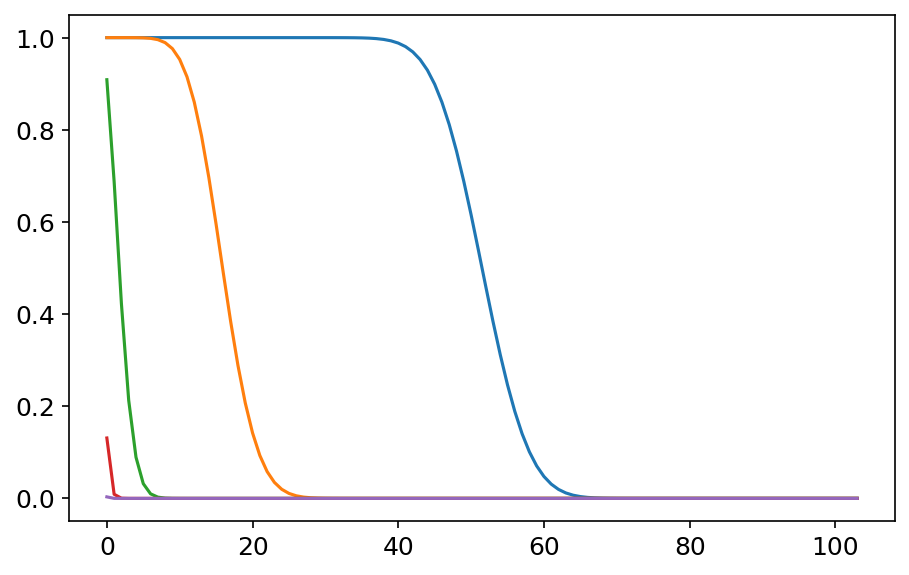

In [467]:
n = np.arange(104)
for thresh in np.arange(1, 6):
    plt.plot(n, P_n_or_more(n, 104, thresh, 1))
plt.show()

In [485]:
5/2*np.log10(0.5/5)

-2.5

In [486]:
# SNR of 0.5 corresponds to 10x fainter?
# 1/2 / 5 == 1/10

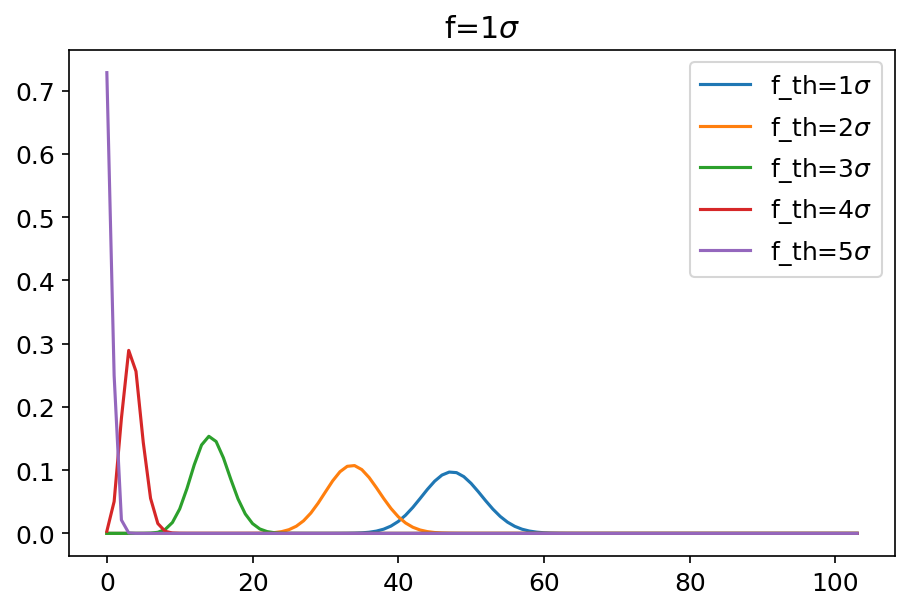

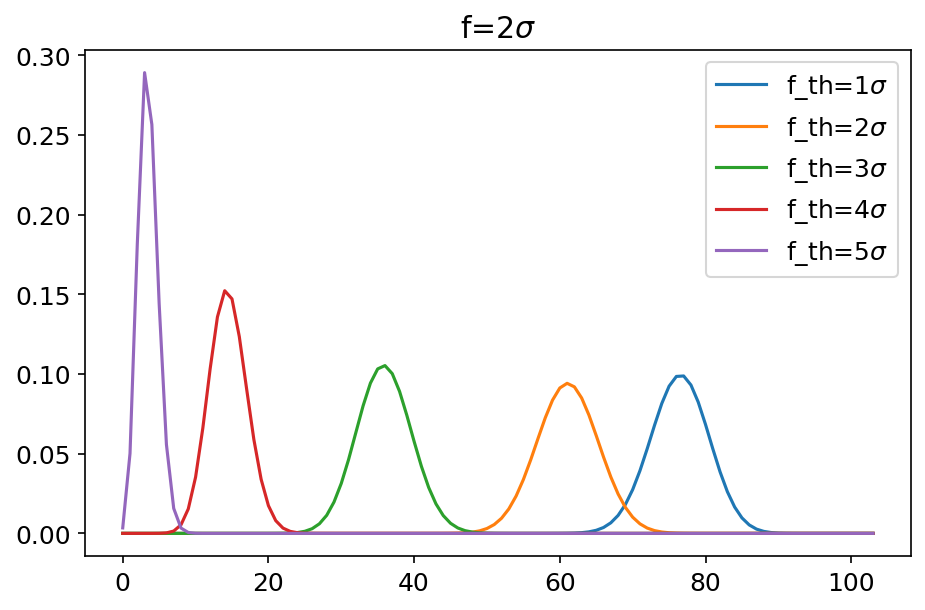

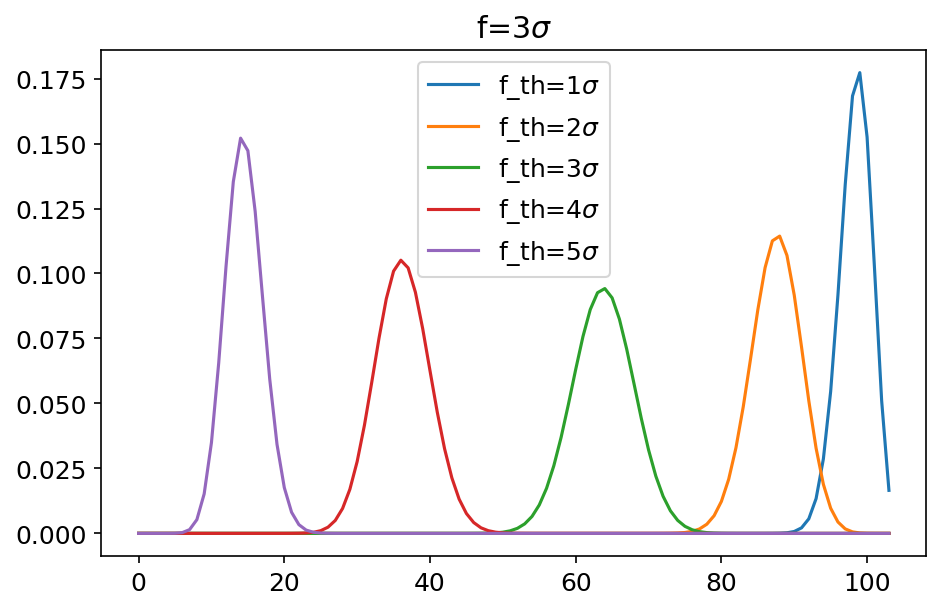

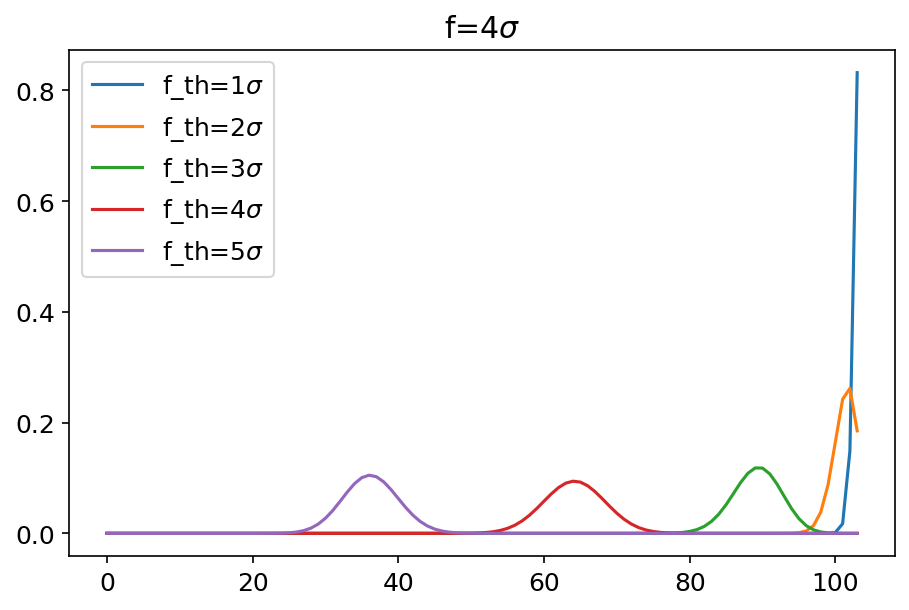

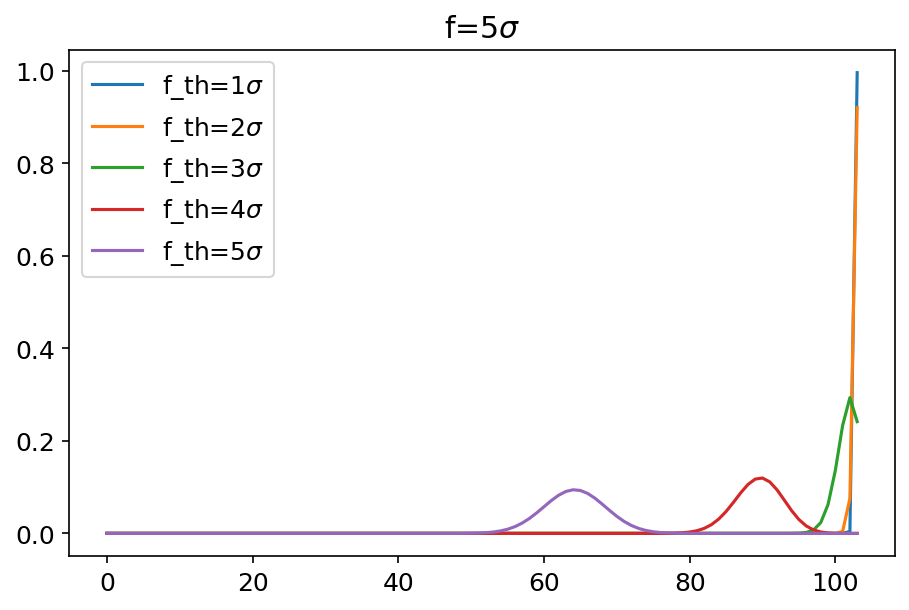

In [479]:
f = 1
thresh = 1

for f in np.arange(1, 6):
    for thresh in np.arange(1, 6):
        # this isn't quite right because the results are correlated with the individual poisson rates...no?
        y = scipy.stats.poisson(prob_in_box(thresh, 1/psfs).sum()).pmf(n) * P_n(n, 104, thresh, f)
        plt.plot(
            n, 
            y / sum(y),
            label=f'f_th={thresh}$\sigma$'
        )
    plt.legend()
    plt.title(f"f={f}$\sigma$")
    plt.show()

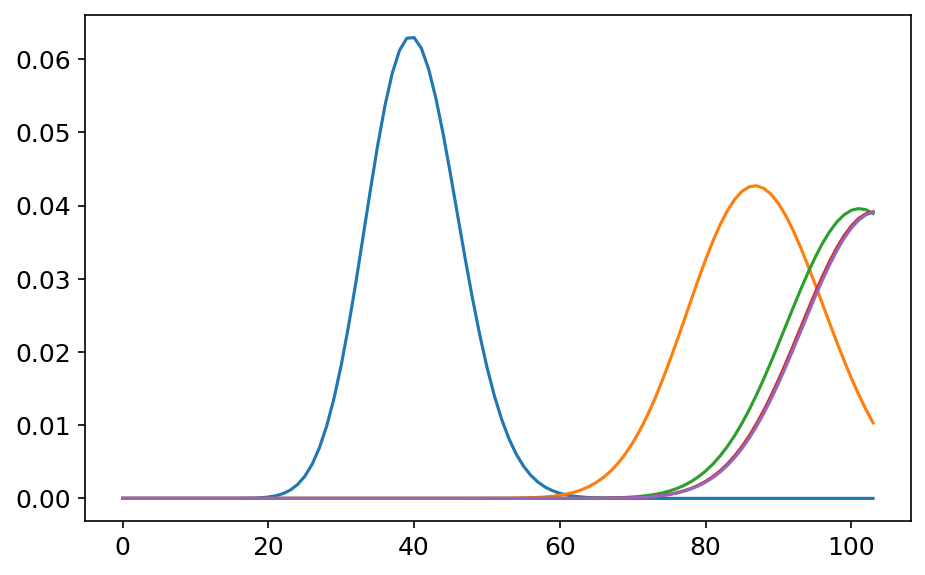

In [466]:
n = np.arange(104)
for thresh in np.arange(1, 6):
    plt.plot(n, scipy.stats.poisson(prob_in_box(thresh, 1/psfs).sum()).pmf(n))
plt.show()

In [446]:
p = scipy.stats.chi2(1).cdf(0.5)
scipy.stats.binom(2, p).pmf(2)

0.27092012280339645

In [444]:
prob_contain_2(1, 1)

0.22119921692859512

In [440]:
thresh = 5
dx = 1
prob_contain_2(thresh, dx/psfs)

array([0.99992474, 0.99953919, 0.99988215, 0.99996149, 0.99996926,
       0.99997133, 0.99999056, 0.9999864 , 0.99980498, 0.99996323,
       0.99950121, 0.9998013 , 0.99999779, 0.99998358, 0.99989101,
       0.9999771 , 0.99988309, 0.99845381, 0.99998752, 0.99997468,
       0.99990845, 0.99995539, 0.99140258, 0.99505818, 0.99982494,
       0.9999542 , 0.99960999, 0.99997258, 0.99997981, 0.99937533,
       0.99992907, 0.99998706, 0.99999306, 0.9998322 , 0.99996902,
       0.99996937, 0.9997703 , 0.99998487, 0.9999059 , 0.99994036,
       0.99998483, 0.99980456, 0.99996529, 0.99989476, 0.99995451,
       0.99999948, 0.99997561, 0.99998097, 0.99990032, 0.99743468,
       0.99999626, 0.99998836, 0.99996255, 0.99320749, 0.99988507,
       0.99993979, 0.99999145, 0.9997993 , 0.99999831, 0.9999995 ,
       0.99670565, 0.99995358, 0.9999879 , 0.99999737, 0.99999641,
       0.99979202, 0.99744208, 0.99990919, 0.99993936, 0.9993092 ,
       0.9999988 , 0.99999561, 0.99999576, 0.99970351, 0.99994

In [422]:
scipy.stats.binom(104, P_f(5, 0)).cdf(10)

1.0

In [413]:
scipy.stats.binom(104, P_f(1, 0)).cdf(52)

0.9999999999999999

In [379]:
P_n_or_more(24, 104, 0.5, 0)

0.9491486878403034

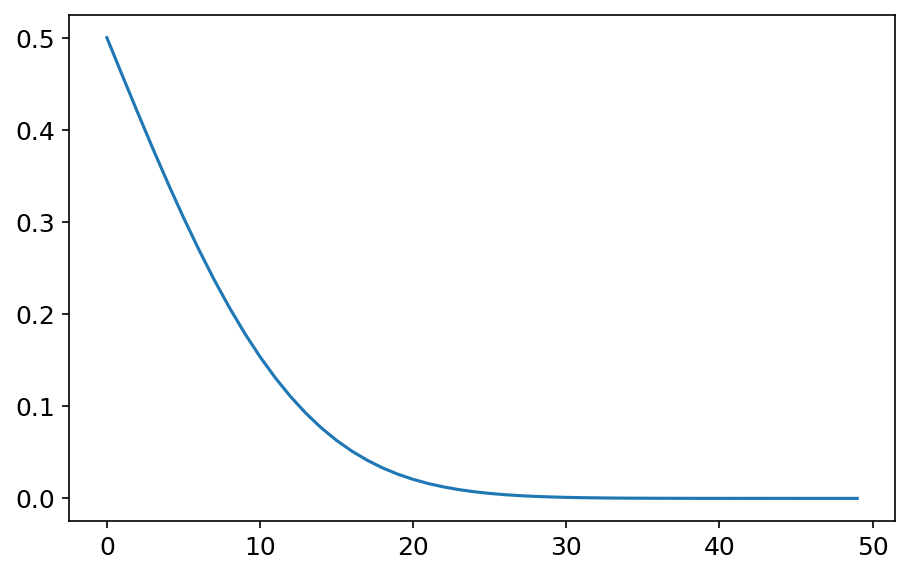

In [361]:
plt.plot(P_f(np.linspace(0, 5), 0))
plt.show()

In [368]:
num_epochs = 104
Nmin = 24
sum([P_n(k, num_epochs, 0, 0) for k in np.arange(Nmin, num_epochs + 1)])

0.9999999953276499

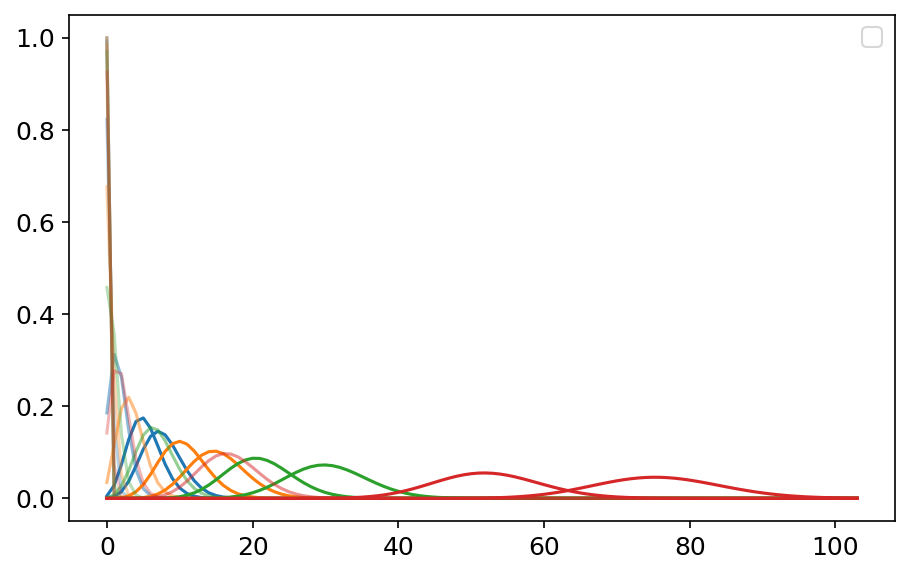

In [314]:
dx = 1 # arcsec
N = np.arange(104)
for i, dx in enumerate([1, 2, 4, 10]):
    for thresh in np.arange(6):
        p = scipy.stats.poisson((n_pk_above(thresh) * (dx/psfs)).sum()).pmf
        plt.plot(N, p(N), color=f'C{i}', alpha=1/max(thresh, 1))

plt.legend()
plt.show()

In [301]:
psfs

array([0.8113378 , 0.90196184, 0.83120854, 0.78414164, 0.77558723,
       0.77300593, 0.73495434, 0.74683631, 0.85536133, 0.78236289,
       0.90664705, 0.85629964, 0.69276074, 0.75319878, 0.82763773,
       0.76482708, 0.83084155, 0.98270241, 0.74398041, 0.76845743,
       0.81984324, 0.78988082, 1.14631954, 1.08490543, 0.85000679,
       0.79091972, 0.89232585, 0.77136139, 0.7603624 , 0.92036904,
       0.80881752, 0.74518904, 0.72539307, 0.84793403, 0.77587774,
       0.77545241, 0.86367611, 0.7504126 , 0.82105535, 0.80157646,
       0.75050718, 0.85547037, 0.78016186, 0.82605573, 0.79064695,
       0.65730831, 0.76709056, 0.75828789, 0.8236208 , 1.02355312,
       0.70717189, 0.74169383, 0.78306979, 1.11893687, 0.83005561,
       0.80197229, 0.73183456, 0.85680328, 0.68581871, 0.65635995,
       1.04570966, 0.79144916, 0.74298306, 0.6974644 , 0.7060315 ,
       0.85860117, 1.02330522, 0.81948667, 0.80226838, 0.92671067,
       0.67713403, 0.71181507, 0.7107897 , 0.8771393 , 0.80046

In [491]:
required_bin_width_for_count(0, 1, psf=0.8113377959186666)

3.3317706497653035

In [63]:
import scipy.special
import scipy.integrate

def B(s, b):
    return (np.pi/b)**0.5 * np.exp(s**2 / (2*b)) * (1 + scipy.special.erf(s/(2*b)**0.5))

def n_pk(z, s=None, R_2=1/2, gamma_2=1/2):
    if s is None:
        s = z
    return (np.exp(-s**2/(2 * gamma_2)) / (8 * np.pi**2 * R_2)) * (
        (1 - gamma_2)*s + 
        (s**2 - gamma_2*(1 + s**2))*B(s, 1) +
        B(s, 3 - 2 * gamma_2)
    )

def n_pk_above(z):
    return scipy.integrate.quad(n_pk, z, 15)[0]

def p_pk(r, z):
    return 1 - np.exp(-n_pk_above(z)*r**2 * np.pi)

def p_pk_square(d, z):
    return 1 - np.exp(-n_pk_above(z)*d**2)

def p_pk_diff(r, z):
    l = n_pk_above(z)
    return 2 * np.pi * r * l * np.exp(-l * r**2 * np.pi)

def r_for_pk(p, z):
#     p = 1 - np.exp(-n_pk_above(z)*r**2 * np.pi)
#     np.exp(-n_pk_above(z)*r**2 * np.pi) = 1 - p
#     -n_pk_above(z)*r**2 * np.pi = np.log(1 - p)
#     r**2 = -np.log(1 - p) / (n_pk_above(z) * np.pi)
    r = (np.log(1 / (1 - p)) / (n_pk_above(z) * np.pi))**0.5
    return r

def d_for_pk_square(p, z):
    d = (np.log(1 / (1 - p)) / (n_pk_above(z)))**0.5
    return d

def d_rel_for_pk(p, p_rel=0.5):
    return (np.log(1 / (1 - p))) / (np.log(1 / (1 - p_rel)))

# plt.plot(z, [p_pk(1, z_i) for z_i in z])
# plt.show()

# p = np.linspace(0, 1, 100)
# for thresh in np.arange(6):
#     plt.plot(p, r_for_pk(p, thresh), label=f'{thresh}')
    
# plt.axhline(10)
# plt.axhline(4)
# plt.axhline(2)
# plt.axhline(1)
# plt.yscale("log")
# plt.ylabel("required $\Delta x$")
# plt.xlabel("probability of detection")
# plt.legend()
# plt.show()

In [230]:
Z = scipy.integrate.quad(
    lambda r : scipy.integrate.quad(
        lambda z : 1 - np.exp(-n_pk_above(z)*r**2*np.pi), 
        -15, 15
    )[0], 
    0, 15
)


In [254]:
z = 0
r = np.linspace(0, 200, 1000)
Z = 0
dz = 0.01
for z in np.arange(0, 10, dz):
    y = 2 * np.pi * r * n_pk_above(z) * np.exp(-n_pk_above(z) * r**2 * np.pi)
    Z += y * dz
#     plt.plot(r, y)
# plt.show()

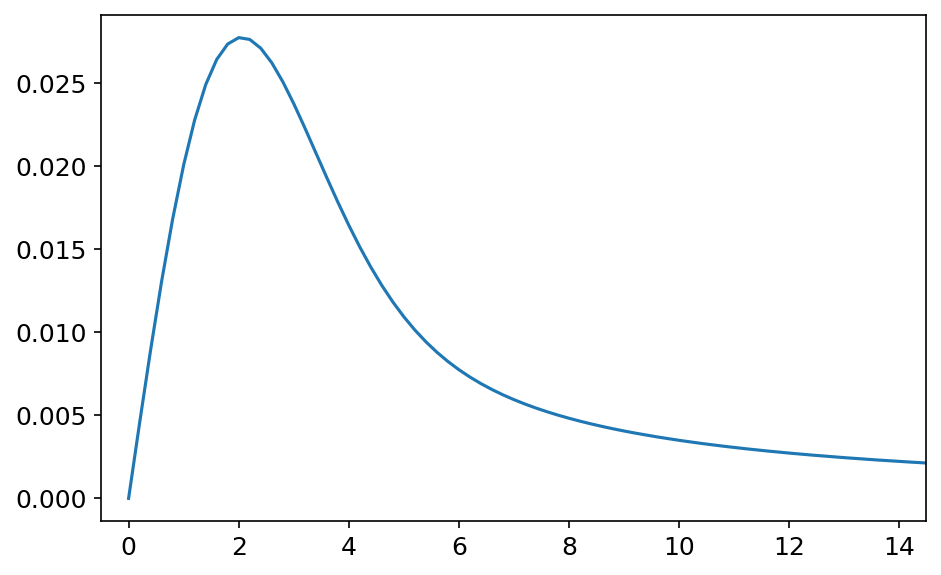

In [255]:
plt.plot(r, Z/Z.sum())
plt.xlim(-0.5, 14.5)
plt.show()

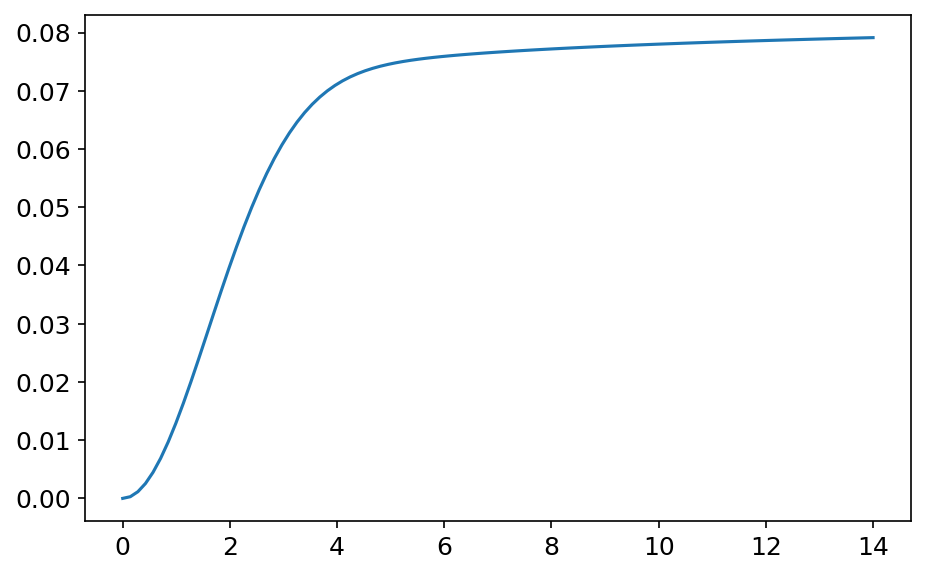

In [234]:
r = np.linspace(0, 14, 100)
y = []
for _r in r:
    y.append(
        scipy.integrate.quad(
        lambda z : 1 - np.exp(-n_pk_above(z)*_r**2*np.pi), 
        -15, 15
        )[0]/Z[0]
    )
plt.plot(r, y)
plt.show()

In [230]:
n_pk_above(0)*(2048*0.263)*(4096*0.263)

34004.28587512274

In [232]:
104*p_pk_square(1/0.80, 0) # we expect 9 peaks in a 1 arcsec bin

9.100247789904673

In [266]:
k = 24
scipy.stats.binom(
    104, 
    p_pk_square(1/0.80, 0)
).pmf(k) 
# this is the likelihood of having k noise detections
# we are doing 1078x540xNdir stacks

# so in fact we expect to have 1078x540xNdir bins above Nmin
Ndir = 30
Nstacks = 1078*540*Ndir
Nstacks * scipy.stats.binom(
    104, 
    p_pk_square(1/0.80, 0)
).pmf(k) 

108.27105405043011

In [214]:
d_for_pk_square(0.99, 0)

8.864550357420082

In [231]:
(1.977/d_for_pk_square(0.3, 0))

0.8013763088146528

In [188]:
(1.977/d_for_pk_square(0.3, 0)) * d_for_pk_square(0.3, 1), 0.3*104 + 3 * (104*0.3*0.7)**0.5

(2.3795766257285025, 45.219985734657506)

In [195]:
p = 0.077
N = 104
(1.977/d_for_pk_square(0.3, 0)) * d_for_pk_square(p, 0), p*N + 3 * (N*p*(1-p))**0.5

(0.9370380367970679, 16.16412996463396)

In [189]:
(1.977/d_for_pk_square(0.3, 0)) * d_for_pk_square(0.3, 2), 0.3*104 + 3 * (104*0.3*0.7)**0.5

(4.192375353152828, 45.219985734657506)

In [190]:
(1.977/d_for_pk_square(0.3, 0)) * d_for_pk_square(0.3, 3), 0.3*104 + 3 * (104*0.3*0.7)**0.5

(12.31050853815733, 45.219985734657506)

In [ ]:
# for d in snr_*/regular/**/filtered_summary.pkl; do
for d in snr_*/**/filtered_summary.pkl; do 
    $SALAD_DIR/env/bin/salad analysis.plot $d $(dirname $d)/clusters_plot --plot-type summary_coadds_plot 1> /dev/null 2>&1 & disown
    $SALAD_DIR/env/bin/salad analysis.plot $d $(dirname $d)/clusters_plot --plot-type summary_lightcurve_plot 1> /dev/null 2>&1 & disown
    $SALAD_DIR/env/bin/salad analysis.plot $d $(dirname $d)/clusters_plot --plot-type summary_cutouts 1> /dev/null 2>&1 & disown
done

In [183]:
d_rel_for_pk(0.3)

0.5145731728297582

In [136]:
n_pk_above(3) * (10**2)

0.15114494003785234

In [164]:
d_for_pk_square(0.1, 3), d_for_pk_square(0.5, snr)

(8.349147574042467, 910.2176095642407)

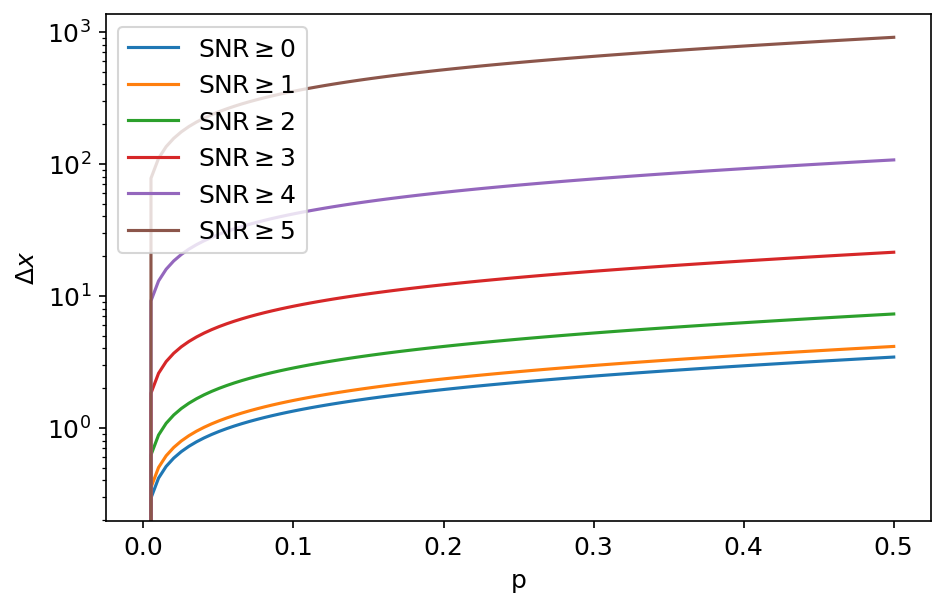

In [167]:
p = np.linspace(0, 0.5, 100)
snr = np.arange(6)

for snr in np.arange(6):
    plt.plot(p, d_for_pk_square(p, snr), label='SNR$\geq$' + f'{snr}')
plt.yscale("log")
plt.ylabel("$\Delta x$")
plt.xlabel("p")
plt.legend()
plt.show()
    

In [168]:
d_for_pk_square(p, snr) / d_for_pk_square(0.5, snr)

array([0.        , 0.08546813, 0.12102387, 0.14841262, 0.17159189,
       0.19209264, 0.21069912, 0.2278767 , 0.24392829, 0.25906408,
       0.27343696, 0.28716225, 0.3003295 , 0.31300984, 0.32526092,
       0.33713021, 0.3486574 , 0.359876  , 0.37081468, 0.38149816,
       0.39194794, 0.40218288, 0.4122196 , 0.42207287, 0.43175586,
       0.4412804 , 0.45065715, 0.45989575, 0.46900499, 0.47799287,
       0.48686671, 0.49563326, 0.50429871, 0.5128688 , 0.52134884,
       0.52974377, 0.53805819, 0.54629639, 0.55446237, 0.56255992,
       0.57059256, 0.57856363, 0.58647626, 0.59433342, 0.60213792,
       0.60989243, 0.61759947, 0.62526145, 0.63288066, 0.64045929,
       0.64799942, 0.65550307, 0.66297214, 0.67040848, 0.67781385,
       0.68518996, 0.69253845, 0.69986089, 0.70715882, 0.71443372,
       0.72168703, 0.72892012, 0.73613435, 0.74333103, 0.75051145,
       0.75767683, 0.76482841, 0.77196737, 0.77909486, 0.78621204,
       0.79332   , 0.80041985, 0.80751266, 0.81459949, 0.82168

In [147]:
for snr in np.arange(6):
    for p in [0.1, 0.25, 0.5]:
        d = (-np.log(1 - p) / n_pk_above(snr))**0.5
        print("{:d} {:0.2f} {:.2f}".format(snr, p, d))

0 0.10 1.34
0 0.25 2.22
0 0.50 3.44
1 0.10 1.61
1 0.25 2.67
1 0.50 4.14
2 0.10 2.84
2 0.25 4.70
2 0.50 7.29
3 0.10 8.35
3 0.25 13.80
3 0.50 21.41
4 0.10 41.80
4 0.25 69.07
4 0.50 107.21
5 0.10 354.87
5 0.25 586.39
5 0.50 910.22


NameError: name 'n_pk' is not defined

In [126]:
p_pk_square(10, 3), d_for_pk_square(0.2, 4)

(0.1402769186675472, 60.82863486458289)

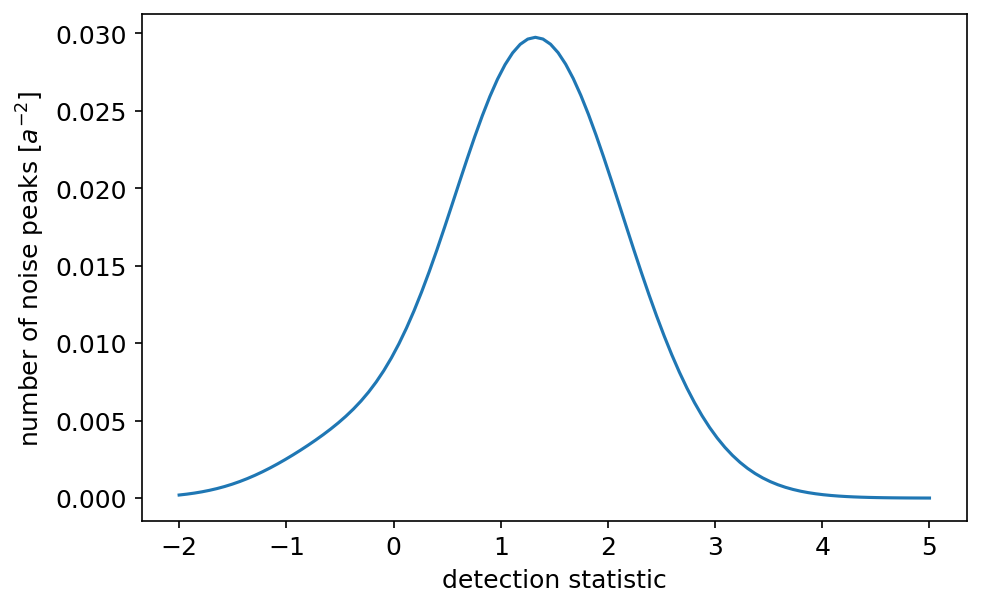

In [62]:
z = np.linspace(-2, 5, 100)
plt.plot(z, n_pk(z))
# plt.plot(z, [n_pk_above(z_i) for z_i in z])
plt.xlabel("detection statistic")
plt.ylabel("number of noise peaks [$a^{-2}$]")
plt.show()

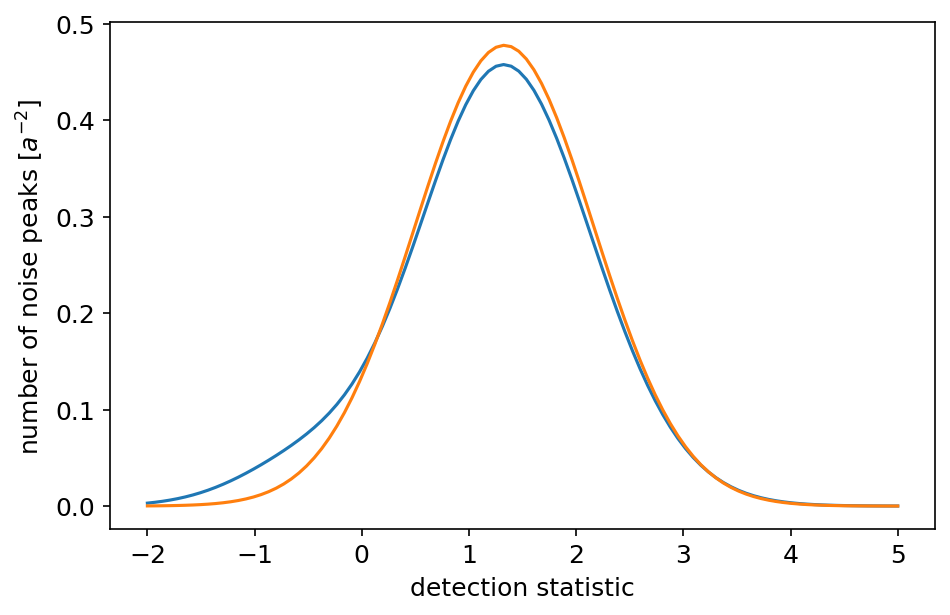

In [280]:
n_pk_above(-10)

z = np.linspace(-2, 5, 100)
plt.plot(z, n_pk(z) / scipy.integrate.quad(n_pk, -30, 30)[0])
p = lambda x : scipy.stats.norm(1.33, 0.835).pdf(x) # * 0.030/0.47777518610950026
y = p(z)
plt.plot(z, y)
# plt.plot(z, [n_pk_above(z_i) for z_i in z])
plt.xlabel("detection statistic")
plt.ylabel("number of noise peaks [$a^{-2}$]")
plt.show()

In [295]:
n_pk_above(5) * (2048*0.263) * (4096*0.263)

0.4854409305157069

In [286]:
(n_pk_above(-30) / scipy.integrate.quad(n_pk, -30, 30)[0])

0.9999999999999998

In [ ]:
def M_noise(k, n):
    # n detections among k epochs
    return (1 - P_N)**(k-n) np.product([nu()])

In [95]:
y = [scipy.integrate.quad(lambda x : p_pk_diff(r_i, x), -10, 10)[0] for r_i in r]

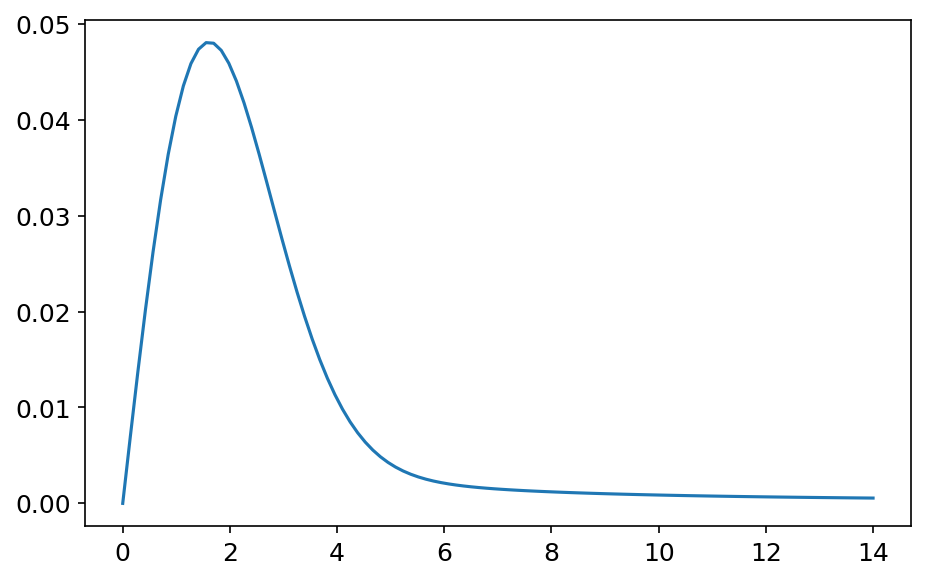

In [98]:
# y = sum([p_pk_diff(r, z_i) for z_i in np.linspace(-10, 10, 100)])
# Z = sum(y)
plt.plot(r, np.array(y) / sum(y))
plt.show()

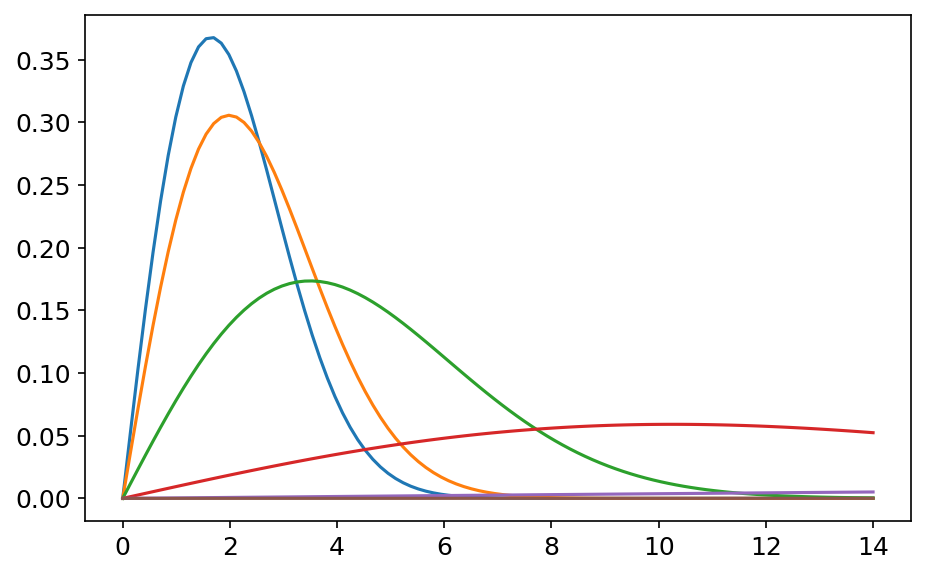

In [75]:
r = np.linspace(0, 14, 100)
for thresh in np.arange(6):
    plt.plot(r, p_pk_diff(r, thresh))
plt.xlabel("r [a]")
plt.ylabel()
plt.show()

In [74]:
p_pk_diff(1, 2)

0.07860026598508375

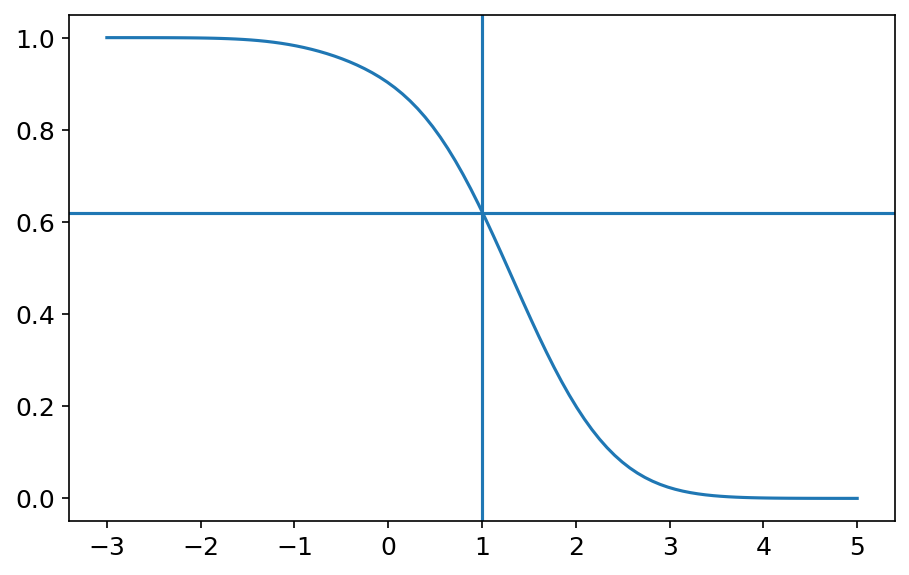

In [60]:
z = np.linspace(-3, 5, 100)
plt.plot(z, [n_pk_above(z_i)/n_pk_above(-10) for z_i in z])
plt.axvline(1)
plt.axhline(0.62)
plt.show()


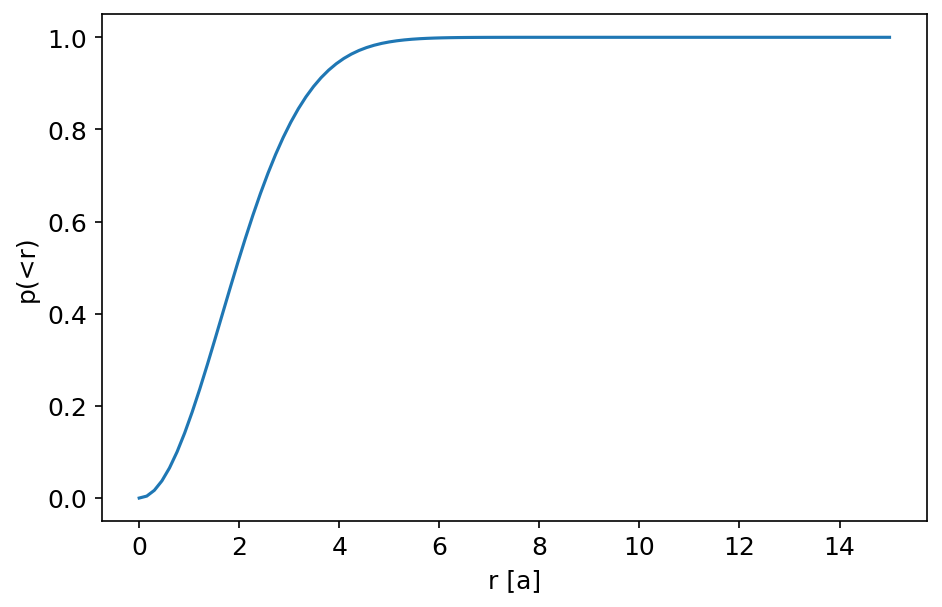

In [47]:
r = np.linspace(0, 15, 100)
plt.plot(r, p_pk(r, 0))
plt.xlabel("r [a]")
plt.ylabel("p(<r)")
plt.show()


/tmp/ipykernel_74146/1222561509.py:26: RuntimeWarning: divide by zero encountered in divide
  r = (np.log(1 / (1 - p)) / (n_pk_above(z) * np.pi))**0.5


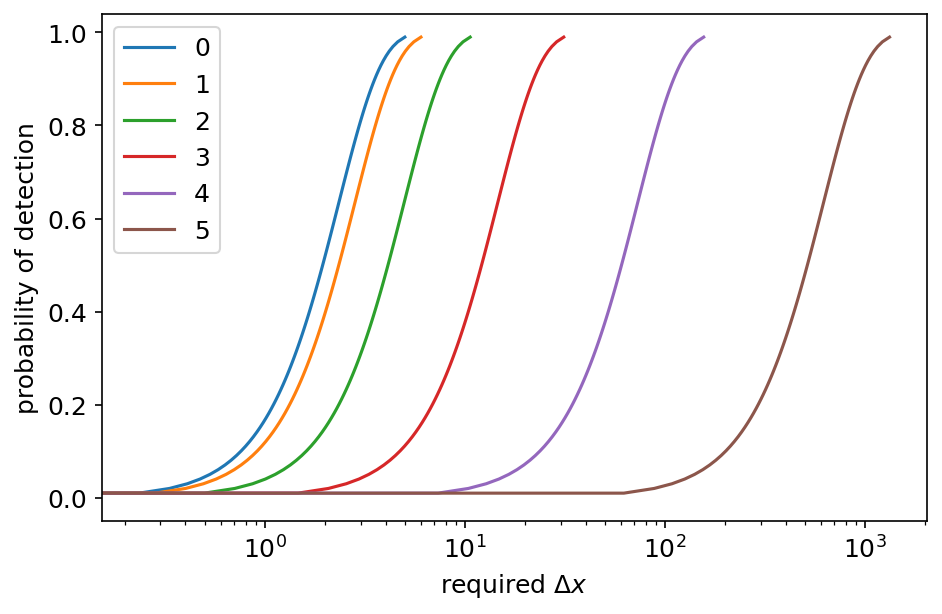

In [33]:
p = np.linspace(0, 1, 100)
for thresh in np.arange(6):
    plt.plot(r_for_pk(p, thresh), p, label=f'{thresh}')
    
plt.xscale("log")
plt.xlabel("required $\Delta x$")
plt.ylabel("probability of detection")
plt.legend()
plt.show()

In [6]:
# min_vote should be set by noise level
# dx is set by noise level
# min_vote is N * p
# or min_vote is x where scipy.stats.binom(n, p).pmf(np.arange(x, n + 1)).sum() < 1%

# the desired rate of contamination is related to the depth I wish to achieve
# i.e. if I expect at most min_vote noise detections, then I need at least that many detections of the object to counter act
# i.e. I will find objects are some SNR below my catalog threshold i.e. they appear min_vote/N times

def prob_detect(obj_snr, thresh_snr):
    return 0.5 * scipy.special.erfc((thresh_snr - obj_snr)*(2**-0.5))

def obj_snr_for_prob(p, thresh_snr):
#     p = 0.5 * scipy.special.erfc((thresh_snr - obj_snr)*(2**-0.5))
#     2 * p = scipy.special.erfc((thresh_snr - obj_snr)*(2**-0.5))
#     scipy.special.inverfc(2 * p) = (thresh_snr - obj_snr)*(2**-0.5)
#     scipy.special.inverfc(2 * p)/(2**-0.5) = (thresh_snr - obj_snr)
    obj_snr = thresh_snr - scipy.special.erfcinv(2 * p)/(2**-0.5)
    return obj_snr

In [555]:
p_pk(10, 5)

0.0002628014724349592

In [28]:
r_for_pk(0.5, 1)

2.3354183508960373

In [556]:
N = 104
p = 0.5

# I tune dx based on the desired rate of contamination
for thresh in [0, 1, 2, 3, 4, 5]:
    dx = min(10, r_for_pk(p, thresh))
    p_eff = p_pk(dx, thresh)
    # I tune min_vote based on the desired rate of contamination
    min_vote = 1
    while scipy.stats.binom(N, p_eff).pmf(np.arange(min_vote, N + 1)).sum() > 0.1:
        min_vote += 1

    print(
        thresh, 
        "{:0.2f}".format(max(0, obj_snr_for_prob(min_vote/N, thresh))), 
        "{:0.2f}".format(dx), 
        min_vote, 
        N * p
    )

0 0.19 1.94 60 52.0
1 1.19 2.34 60 52.0
2 2.19 4.11 60 52.0
3 2.88 10.00 47 52.0
4 2.34 10.00 5 52.0
5 2.66 10.00 1 52.0


In [ ]:
# how do I test this?

In [542]:
# obj_snr_for_prob(27/104, 3)

2.355468393893387

In [534]:
prob_detect(3, 4)

0.15865525393145707

In [528]:
# one can dig into the noise by lowering the catalog threshold and tolerable noise rates

In [518]:
r_for_pk(0.2, 3)

6.85520470054033

In [517]:
n = 104
p = 0.5
scipy.stats.binom(n, p).pmf(np.arange(64, n + 1)).sum() # <1 % chance to have more than 64

0.01182281787488404

In [ ]:
    

p = 0.5
for snr in np.arange(0, 6):
    print(snr, r_for_pk(p, snr), required_bin_width_for_count(snr, 0.5, psf=0.8113377959186666))

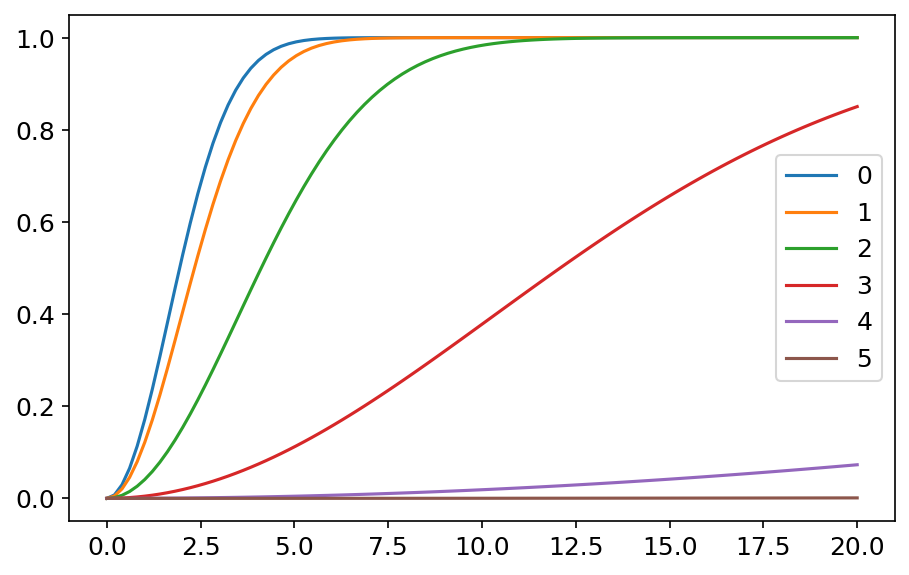

In [7]:
r = np.linspace(0, 20, 100)
for snr in np.arange(0, 6):
    plt.plot(r, p_pk(r, snr), label=f"{snr}")

plt.legend()
plt.show()

In [442]:
import scipy.integrate

In [451]:
scipy.integrate.quad(n_pk, 0, 10) * 

(0.05860467493899069, 5.096517892498424e-09)

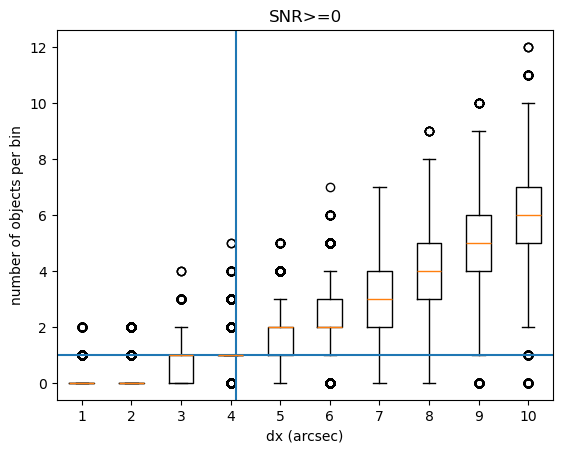

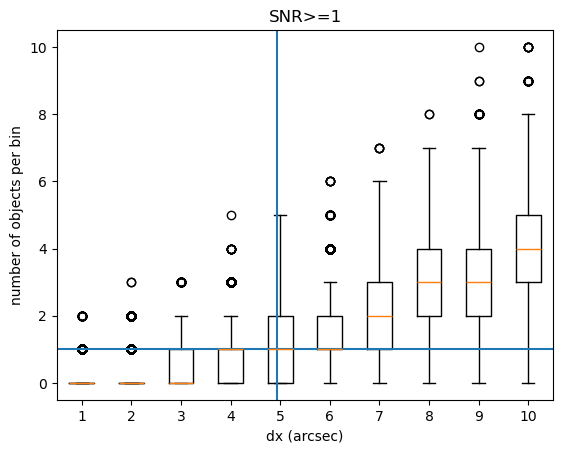

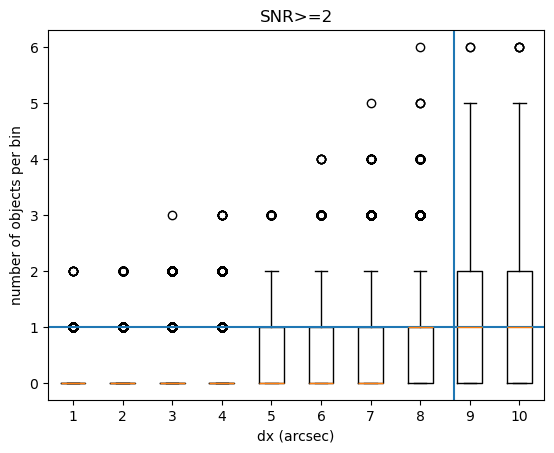

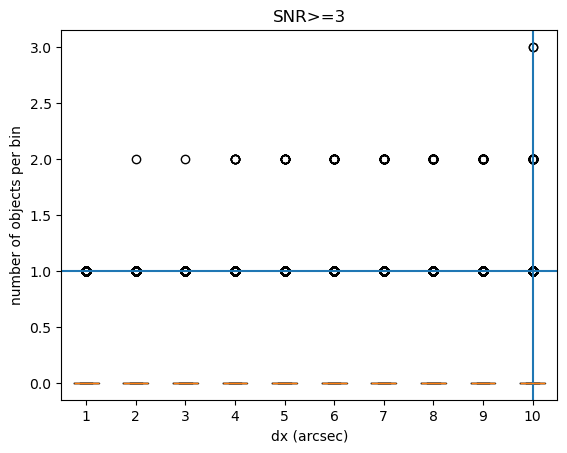

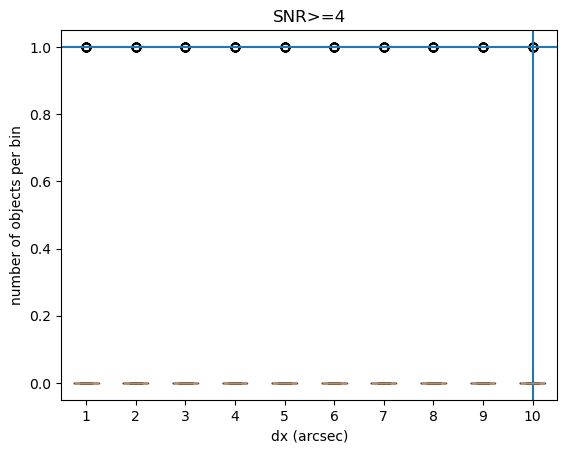

In [426]:
for snr in np.arange(0, 5):
    _c = detect(noise, threshold=float(snr), no_masks=True).catalog
    X = np.array([_c['ra'].to(u.deg), _c['dec'].to(u.deg), np.ones_like(_c['dec'])]).T
    
    directions = SearchDirections([0*u.deg/u.day, 0.05*u.deg/u.day], [0*u.deg, 0*u.deg], 10*u.arcsec, 1*u.day)
    projection = project(X, directions, 1)

    x = np.arange(1, 11)
    q1 = []
    q2 = []
    q3 = []
    dist = []
    for dx in x:
        dx = dx*u.arcsec
        hough = Hough(projection, dx, dx)
        d = hough.array[0].flatten()
        dist.append(d)
        o = np.percentile(d, [10, 50, 90])
        q1.append(o[0])
        q2.append(o[1])
        q3.append(o[2])

    plt.boxplot(dist)
    
    r = required_bin_width_for_count(snr, 1)
    plt.axhline(1)
    plt.axvline(min(r, 10))
    plt.xticks(x)
    plt.xlabel("dx (arcsec)")
    plt.ylabel("number of objects per bin")
    plt.title(f"SNR>={snr}")
    plt.show()
#     np.percentile(d, [10, 50, 90])

In [720]:
len(set(catalog.time))

104

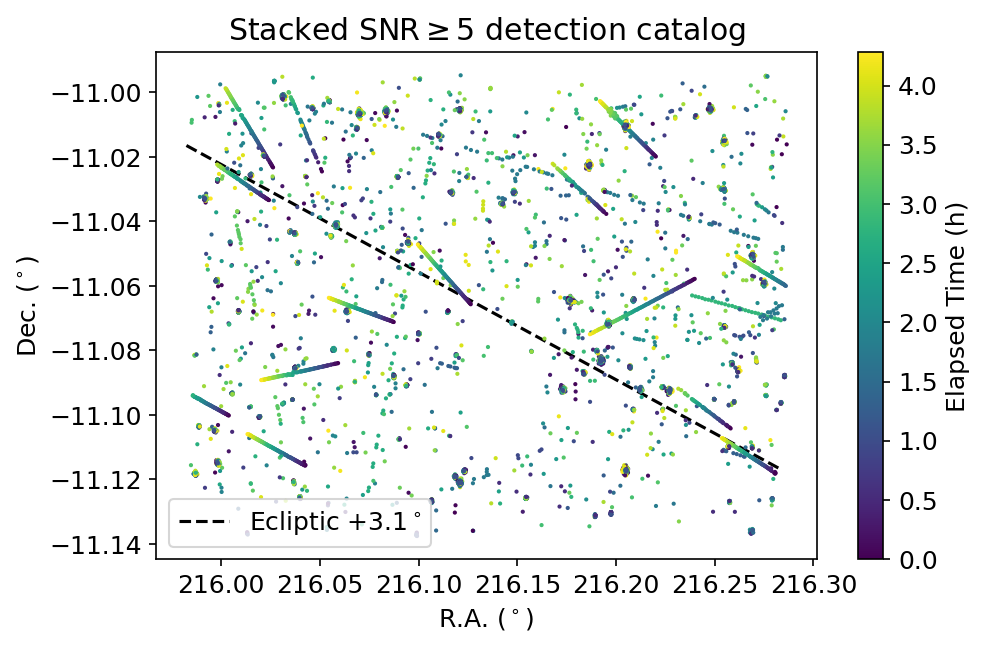

In [8]:
from astropy.coordinates import SkyCoord
from astropy.coordinates import SkyCoord, BarycentricMeanEcliptic, ICRS

catalog = read("../search/new/DEEP/20190403/A0c/detector_1/snr_5.0/regular/catalog.pkl")


X = catalog.X()
coords = SkyCoord(X[:, 0]*u.deg, X[:, 1]*u.deg, frame='icrs')
coords_e = coords.transform_to(BarycentricMeanEcliptic())
time = (X[:, 2] - X[:, 2].min())*u.day
lon = np.linspace(coords_e.lon.min(), coords_e.lon.max(), 100)
ecliptic = BarycentricMeanEcliptic(lat=np.ones_like(lon) * 3.1, lon=lon).transform_to(ICRS())

fig = plt.figure()

plt.plot(ecliptic.ra, ecliptic.dec, color='k', zorder=0, ls='--', label='Ecliptic +$3.1^\circ$')
plt.scatter(
    coords.ra, coords.dec, c=time.to(u.hour).value, s=1, 
    rasterized=True
)
# plt.scatter(
#     coords_e.lon, coords_e.lat, c=time.to(u.hour).value, s=1
# )


# sc = SkyCoord(catalog.ra, catalog.dec)
# plt.scatter(
#     sc.ra, 
#     sc.dec, 
#     c=(catalog.time - catalog.time.min()).to(u.hour).value, 
#     s=1,
#     rasterized=True
# )
plt.xlabel("R.A. ($^\circ$)")
plt.ylabel("Dec. ($^\circ$)")
plt.title("Stacked SNR$\geq$5 detection catalog")
cbar = plt.colorbar()
cbar.set_label("Elapsed Time (h)")
plt.legend()

for ext in ['png', 'jpg', 'pdf']:
    plt.savefig(f"figures/paper/catalog.{ext}", bbox_inches='tight')
    
plt.show()

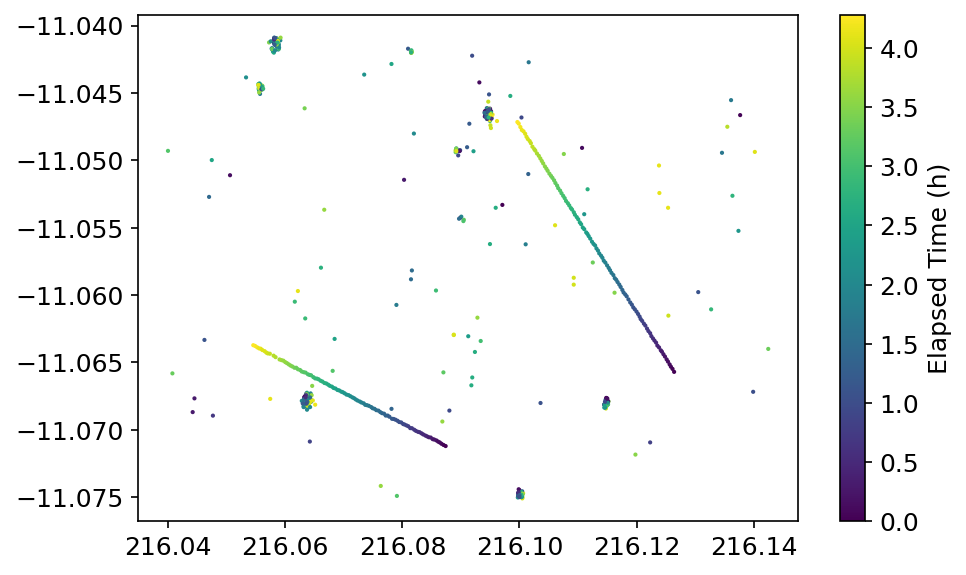

In [13]:
# catalog = read("../search/new/DEEP/20190403/A0c/detector_1/snr_10.0/regular/catalog.pkl")
# fig = plt.figure(dpi=150, facecolor='white')
# plt.scatter(catalog.ra, catalog.dec, c=catalog.time, s=1)
# plt.colorbar()
# plt.show()

m = (
    (catalog.ra > 3.7706) & (catalog.ra < 3.7724) &
    (catalog.dec > -0.1933) & (catalog.dec < -0.1927)
)

x = X[m]

plt.scatter(
    coords[m].ra, 
    coords[m].dec, 
    s=1, 
    c=time[m].to(u.hour).value,
)
cbar = plt.colorbar()
cbar.set_label("Elapsed Time (h)")

# plt.scatter(
#     (catalog.ra[m] - catalog.ra[m].min()).to(u.arcsec), 
#     catalog.dec[m], 
#     s=1, 
#     c=catalog.time[m],
#     alpha=0.5
# )
plt.show()

In [10]:
from salad.primitives import digitize_xy, transform_to_xy_prime, vote_points

In [752]:
truth_1.beta[0].value

array([-0.18408863,  0.04180718])

In [759]:
X[:, 2].min()

58577.21560552204

In [23]:
from salad.project import Projection

p = Projection()
p.X = x
p.directions = SearchDirections(None, None, 10*u.arcsec, time.max(), b=truth_1.beta)
p.reference_time = X[:, 2].min()
p.projected = transform_to_xy_prime(x[:, 0:3], p.directions.value, p.reference_time)

Hough(p, 10/3600, 10/3600)

ValueError: Quantity truthiness is ambiguous, especially for logarithmic units and temperatures. Use explicit comparisons.

In [777]:
width = (x[:, 0].max())
hough = np.zeros((x[:, 0].min()))

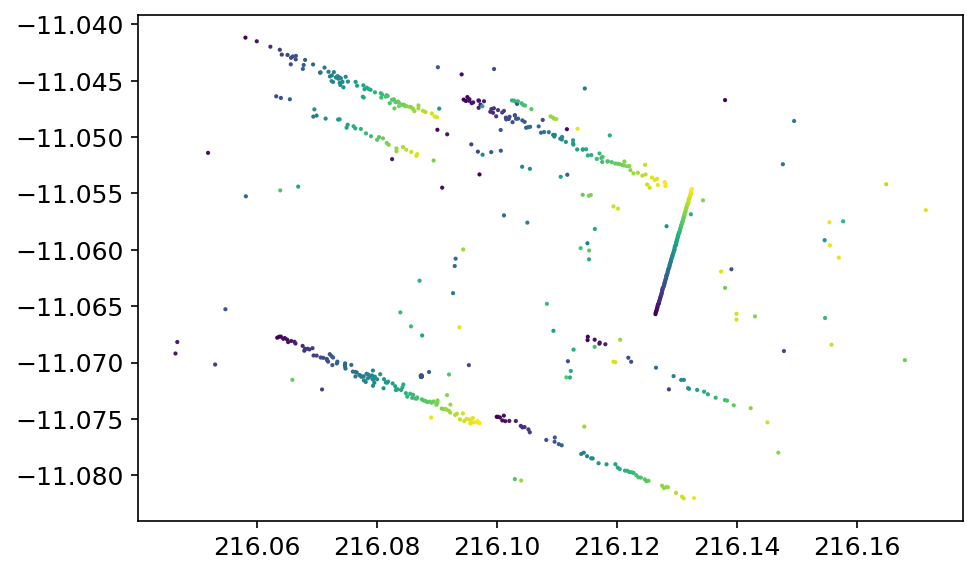

In [769]:

x = X[m]

projected = transform_to_xy_prime(x[:, 0:3], truth_1.beta.value, reference_epoch)[0]
projected_coords = SkyCoord(projected[:, 0]*u.deg, projected[:, 1]*u.deg)

plt.scatter(
    projected_coords.ra, projected_coords.dec, 
    s=1, 
    c=x[:, 3]
)
plt.show()

In [774]:
digitize_xy(projected[None, :], projected[:, 0].min(), projected[:, 1].min(), 10/3600, 10/3600)

array([[[30,  9],
        [ 9,  4],
        [14,  3],
        ...,
        [22,  1],
        [23,  4],
        [29,  6]]], dtype=int32)

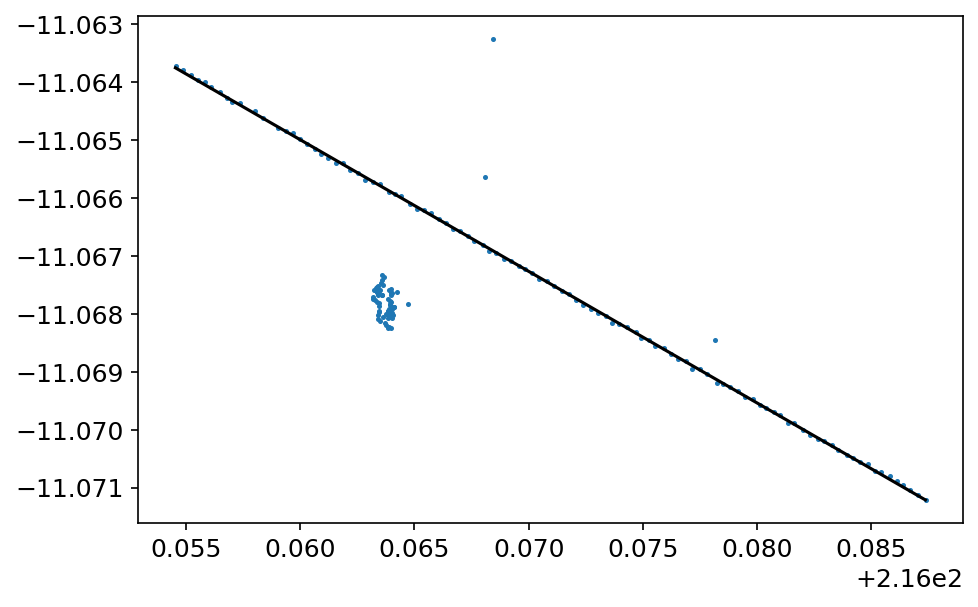

In [20]:
catalog = read("../search/new/DEEP/20190403/A0c/detector_1/snr_10.0/regular/catalog.pkl")

m = (
    (catalog.ra > 3.77075) & (catalog.ra < 3.77150) &
    (catalog.dec > -0.19325) & (catalog.dec < -0.19308)
)

# plt.scatter(catalog.ra[m], catalog.dec[m], s=1, c=catalog.time[m])
# plt.show()

c1 = Cluster()
c1.points = catalog.X()[m]
c1.line = Line(
    alpha=1*u.deg, 
    beta=1*u.deg/u.day
)
truth_1 = refine(c1)['line']
plot_cluster(
    c1,
    s=2,
#     c=catalog.time[m]
)
plot_line(
    truth_1, 
    u.day*np.linspace(catalog.time.min(), catalog.time.max(), 100), 
    color='k'
)
plt.show()

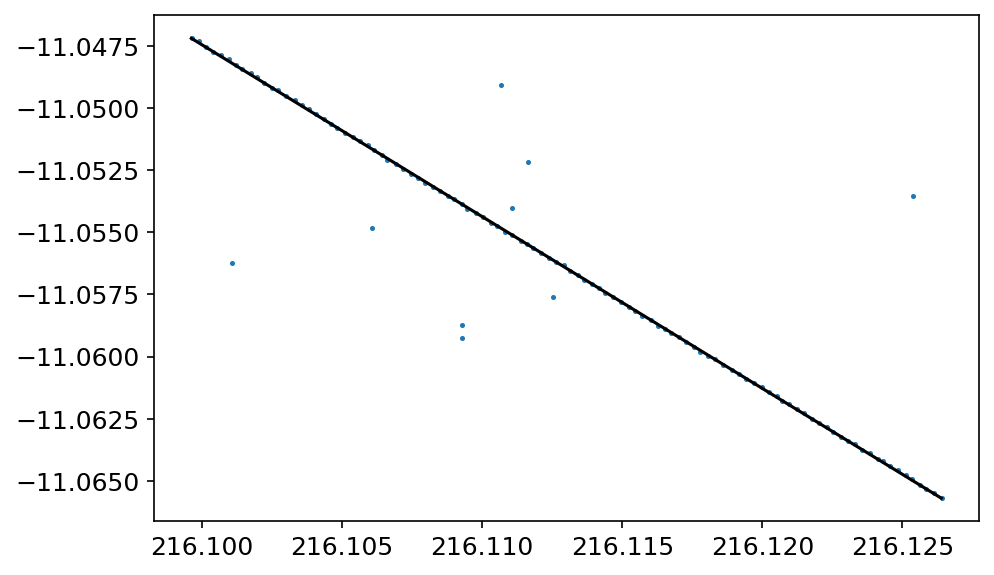

In [21]:
m = (
    (catalog.ra > 3.7716) & (catalog.ra < 3.77225) &
    (catalog.dec > -0.1932) & (catalog.dec < -0.19275)
)

# plt.scatter(catalog.ra[m], catalog.dec[m], s=1, c=catalog.time[m])
# plt.show()

c2 = Cluster()
c2.points = catalog.X()[m]
c2.line = Line(
    alpha=1*u.deg, 
    beta=1*u.deg/u.day
)
truth_2 = refine(c2)['line']
plot_cluster(
    c2,
    s=2
)
plot_line(
    truth_2, 
    u.day*np.linspace(catalog.time.min(), catalog.time.max(), 100), 
    color='k'
)
plt.show()

In [22]:
truth_2.beta

<Quantity [[-0.15011421,  0.10378143]] deg / d>

In [16]:
from salad.regression import regression
from salad.refine import refine
from salad.cluster import Cluster
from salad.analysis.plot import plot_line, plot_cluster
from salad.line import Line

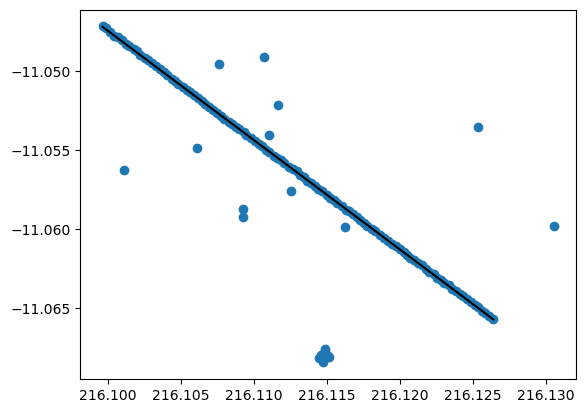

In [666]:
c = Cluster()
c.points = catalog.X()[m]
c.line = Line(
    alpha=1*u.deg, 
    beta=1*u.deg/u.day
)
plot_cluster(c)
plot_line(
    refine(c)['line'], 
    u.day*np.linspace(catalog.time.min(), catalog.time.max(), 100), 
    color='k'
)
plt.show()

In [642]:
np.array([catalog.ra[m], catalog.dec[m]]).shape

(2, 124)

In [649]:
result = regression(np.array([catalog.time[m]]).T, np.array([catalog.ra[m], catalog.dec[m]]).T)
plot_line(result, np.array([catalog.time[m]]).T)

AttributeError: 'RegressionResult' object has no attribute 'predict'

In [ ]:
m = (
    (catalog.ra > 3.7706) & (catalog.ra < 3.7724) &
    (catalog.dec > -0.1933) & (catalog.dec < -0.1927)
)

plt.scatter(catalog.ra[m], catalog.dec[m], s=1, c=catalog.time[m])
plt.show()

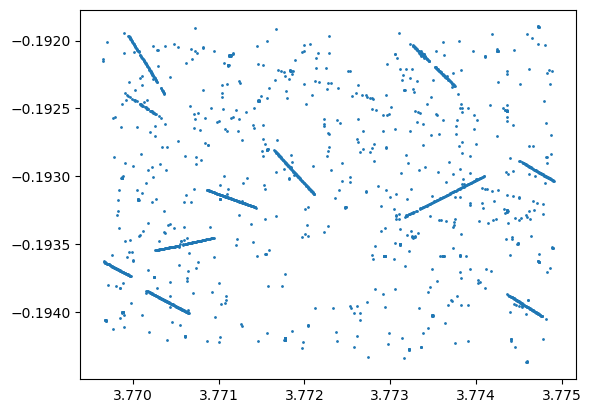

In [613]:
projection = project(catalog.X(), SearchDirections([0, 0]*u.deg/u.day, [0, np.pi]*u.rad, 1*u.arcsec, 4*u.hour), catalog.time.min())
hough = Hough(projection, 0.25*u.arcsec, 0.25*u.arcsec)

for cluster in hough:
    if len(cluster.points) < 10:
        break
        
plt.scatter(catalog.ra[hough.mask], catalog.dec[hough.mask], s=1)
plt.show()

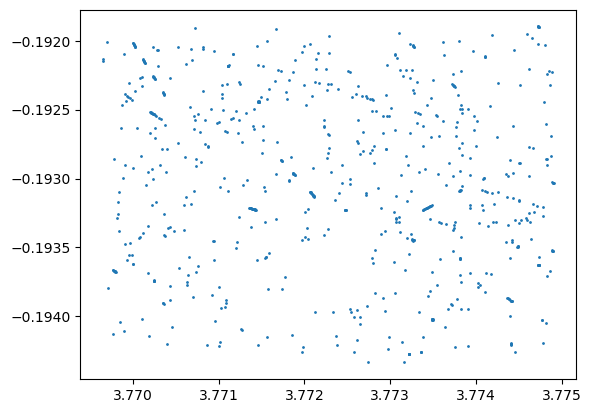